# MIE1624 - Assignment 1

## Overview of Assignment 1

### The dataset provided (mutiplechoiceResponses.csv) contain the survey results provided by Kaggle. The survey results from 23860 participants are shown in 395 columns, representing survey questions. Not all questions are answered by each participant, and responses contain various data types.
### The purpose of this assignment is to:
### (I) understand and explore employment in the data science community, as represented in a survey conducted by Kaggle.
### (II) train, validate, and tune multi-class ordinary classification problem that can classify, given a set of survey responses by a data scientist, what a survey respondent’s current yearly compensation bucket is.

### A detailed examination of the dataset provided (multiplechoiceResponses.csv)  was carried out in the order listed below.
### (1) Data Cleaning
### (2) Exploratory Data Analysis
### (3) Feature Selection
### (4) Model Implementation
### (5) Model Tuning
### (6) Testing and Discussion 


## Importing necessary libraries and packages

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install sklearn
import sklearn as sk
from sklearn.linear_model import LogisticRegression
import warnings
#warnings.filterwarnings("ignore", category=ConvergenceWarning)
warnings.filterwarnings("ignore")
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV


### Reading Dataset

In [3]:
multiplechoiceresponse = pd.read_csv("multipleChoiceResponses.csv", low_memory=False) 

#### Expanding the output display to see more information about the dataset

In [4]:
pd.options.display.max_columns = 395 # To display more columns
pd.options.display.max_rows = 395 # To display more rows
pd.options.display.max_seq_items = 150 # Printing a long sequence, no more then max_seq_items will be printed
pd.options.display.max_colwidth = 80 # To see untruncated form of each column

#### Checking Dataset

In [5]:
multiplechoiceresponse.head() # To see the first 5 rows in the dataset

Time from Start to Finish (seconds)                                      Q1  \
0               Duration (in seconds)  What is your gender? - Selected Choice   
1                                 710                                  Female   
2                                 434                                    Male   
3                                 718                                  Female   
4                                 621                                    Male   

                                           Q1_OTHER_TEXT  \
0  What is your gender? - Prefer to self-describe - Text   
1                                                     -1   
2                                                     -1   
3                                                     -1   
4                                                     -1   

                            Q2                                         Q3  \
0  What is your age (# years)?  In which country do you currently reside?   
1                        45-49                   United States of America   
2                        30-34                                  Indonesia   
3                        30-34                   United States of America   
4                        35-39                   United States of America   

                                                                                Q4  \
0  What is the highest level of formal education that you have attained or plan...   
1                                                                  Doctoral degree   
2                                                                Bachelor’s degree   
3                                                                  Master’s degree   
4                                                                  Master’s degree   

                                                                 Q5  \
0  Which best describes your undergraduate major? - Selected Choice   
1                                                             Other   
2                                Engineering (non-computer focused)   
3                     Computer science (software engineering, etc.)   
4       Social sciences (anthropology, psychology, sociology, etc.)   

                                                                                Q6  \
0  Select the title most similar to your current role (or most recent title if ...   
1                                                                       Consultant   
2                                                                            Other   
3                                                                   Data Scientist   
4                                                                     Not employed   

                                                                     Q6_OTHER_TEXT  \
0  Select the title most similar to your current role (or most recent title if ...   
1                                                                               -1   
2                                                                                0   
3                                                                               -1   
4                                                                               -1   

                                                                                Q7  \
0  In what industry is your current employer/contract (or your most recent empl...   
1                                                                            Other   
2                                                        Manufacturing/Fabrication   
3                                                                   I am a student   
4                                                                              NaN   

                                                                     Q7_OTHER_TEXT  \
0  In what industry is your current employer/contract (or your most recent empl...   
1                       

In [6]:
multiplechoiceresponse.shape # To check the total rows and columns in the dataset

(23860, 395)

In [7]:
multiplechoiceresponse.count() # To count the amount of rows filled in the columns 'Qs'

Time from Start to Finish (seconds)    23860
Q1                                     23860
Q1_OTHER_TEXT                          23860
Q2                                     23860
Q3                                     23860
Q4                                     23439
Q5                                     22948
Q6                                     22901
Q6_OTHER_TEXT                          23860
Q7                                     21686
Q7_OTHER_TEXT                          23860
Q8                                     21102
Q9                                     20186
Q10                                    20670
Q11_Part_1                              9533
Q11_Part_2                              5482
Q11_Part_3                              5234
Q11_Part_4                              7234
Q11_Part_5                              4935
Q11_Part_6                              3472
Q11_Part_7                              1193
Q11_OTHER_TEXT                         23860
Q12_MULTIP

# (1) Data Cleaning 
### This is a rigorous process of observing and correcting the raw data collected and getting it into a form ready for analysis.

##### After reading the dataset (multiplechoiceResponses.csv) file and counting the amount of objects in each columns, it is evident that they first 4 columns are filled while the rest of the columns are incomplete. It appears we are dealing with missing values.  The next step is to examine how much null values are there and using a method to replace, clean or delete (whatever the case may be).

In [8]:
multiplechoiceresponse_missing = multiplechoiceresponse.isnull() 
multiplechoiceresponse_missing.head()

Time from Start to Finish (seconds)     Q1  Q1_OTHER_TEXT     Q2     Q3  \
0                                False  False          False  False  False   
1                                False  False          False  False  False   
2                                False  False          False  False  False   
3                                False  False          False  False  False   
4                                False  False          False  False  False   

      Q4     Q5     Q6  Q6_OTHER_TEXT     Q7  Q7_OTHER_TEXT     Q8     Q9  \
0  False  False  False          False  False          False  False  False   
1  False  False  False          False  False          False   True   True   
2  False  False  False          False  False          False  False  False   
3  False  False  False          False  False          False  False  False   
4  False  False  False          False   True          False   True   True   

     Q10  Q11_Part_1  Q11_Part_2  Q11_Part_3  Q11_Part_4  Q11_Part_5  \
0  False       False       False       False       False       False   
1  False       False       False       False        True       False   
2  False        True        True        True        True        True   
3  False       False        True        True        True        True   
4   True        True        True        True        True        True   

   Q11_Part_6  Q11_Part_7  Q11_OTHER_TEXT  Q12_MULTIPLE_CHOICE  \
0       False       False           False                False   
1        True        True           False                False   
2       False        True           False                False   
3        True        True           False                False   
4        True        True           False                False   

   Q12_Part_1_TEXT  Q12_Part_2_TEXT  Q12_Part_3_TEXT  Q12_Part_4_TEXT  \
0            False            False            False            False   
1            False            False            False            False   
2            False            False            False            False   
3            False            False            False            False   
4            False            False            False            False   

   Q12_Part_5_TEXT  Q12_OTHER_TEXT  Q13_Part_1  Q13_Part_2  Q13_Part_3  \
0            False           False       False       False       False   
1            False           False       False        True        True   
2            False           False        True        True        True   
3            False           False        True        True        True   
4            False           False       False       False       False   

   Q13_Part_4  Q13_Part_5  Q13_Part_6  Q13_Part_7  Q13_Part_8  Q13_Part_9  \
0       False       False       False       False       False       False   
1        True        True        True        True        True        True   
2        True        True        True        True        True        True   
3        True        True        True       False        True        True   
4        True        True        True        True       False        True   

   Q13_Part_10  Q13_Part_11  Q13_Part_12  Q13_Part_13  Q13_Part_14  \
0        False        False        False        False        False   
1         True         True         True         True         True   
2         True         True         True         True        False   
3         True         True         True         True         True   
4         True        False         True         True         True   

   Q13_Part_15  Q13_OTHER_TEXT  Q14_Part_1  Q14_Part_2  Q14_Part_3  \
0        False           False       False       False       False   
1         True           False        True        True        True   
2         True           False        True        True        True   
3         True           False        True        True        True   
4         True           False       False       False        True   

   Q14_Part_4  Q14_Part_5  Q14_Part_6  Q14_Part_7  Q

#### The output above shows 'False' if it is not null(missing) and shows 'True' if it is missing.

In [9]:
multiplechoiceresponse_missing.dtypes

Time from Start to Finish (seconds)    bool
Q1                                     bool
Q1_OTHER_TEXT                          bool
Q2                                     bool
Q3                                     bool
Q4                                     bool
Q5                                     bool
Q6                                     bool
Q6_OTHER_TEXT                          bool
Q7                                     bool
Q7_OTHER_TEXT                          bool
Q8                                     bool
Q9                                     bool
Q10                                    bool
Q11_Part_1                             bool
Q11_Part_2                             bool
Q11_Part_3                             bool
Q11_Part_4                             bool
Q11_Part_5                             bool
Q11_Part_6                             bool
Q11_Part_7                             bool
Q11_OTHER_TEXT                         bool
Q12_MULTIPLE_CHOICE             

#### Carrying out mathematical operations with boolean will convert 'True(s)' to 1 and 'False(s)' to 0.

In [10]:
#To Count the number of misssing values in each of the columns
multiplechoiceresponse_num_missing = multiplechoiceresponse_missing.sum() 
multiplechoiceresponse_num_missing

Time from Start to Finish (seconds)        0
Q1                                         0
Q1_OTHER_TEXT                              0
Q2                                         0
Q3                                         0
Q4                                       421
Q5                                       912
Q6                                       959
Q6_OTHER_TEXT                              0
Q7                                      2174
Q7_OTHER_TEXT                              0
Q8                                      2758
Q9                                      3674
Q10                                     3190
Q11_Part_1                             14327
Q11_Part_2                             18378
Q11_Part_3                             18626
Q11_Part_4                             16626
Q11_Part_5                             18925
Q11_Part_6                             20388
Q11_Part_7                             22667
Q11_OTHER_TEXT                             0
Q12_MULTIP

#### Here, the output above shows the sum of 'True(s)' (i.e missing values).

In [11]:
#Percentage of missing value
percentage_of_missing_values = multiplechoiceresponse_num_missing / len(multiplechoiceresponse) * 100 
percentage_of_missing_values.sort_values(ascending=False)

Q38_Part_20                            99.995809
Q38_Part_19                            99.995809
Q28_Part_22                            99.924560
Q28_Part_24                            99.865884
Q29_Part_16                            99.836547
Q29_Part_25                            99.773680
Q29_Part_14                            99.748533
Q29_Part_24                            99.740151
Q30_Part_15                            99.740151
Q29_Part_23                            99.719195
Q30_Part_21                            99.715004
Q29_Part_17                            99.698240
Q30_Part_23                            99.656329
Q28_Part_18                            99.643755
Q28_Part_33                            99.626991
Q29_Part_4                             99.564124
Q28_Part_30                            99.505448
Q28_Part_1                             99.501257
Q28_Part_23                            99.497066
Q14_Part_4                             99.497066
Q27_Part_12         

#### The output above is the conversion of the number of missing values in a column to percentage, this way we can easily quanitify how much the dataset needs to be cleaned.

#### Plotting a heatmap to view missing data

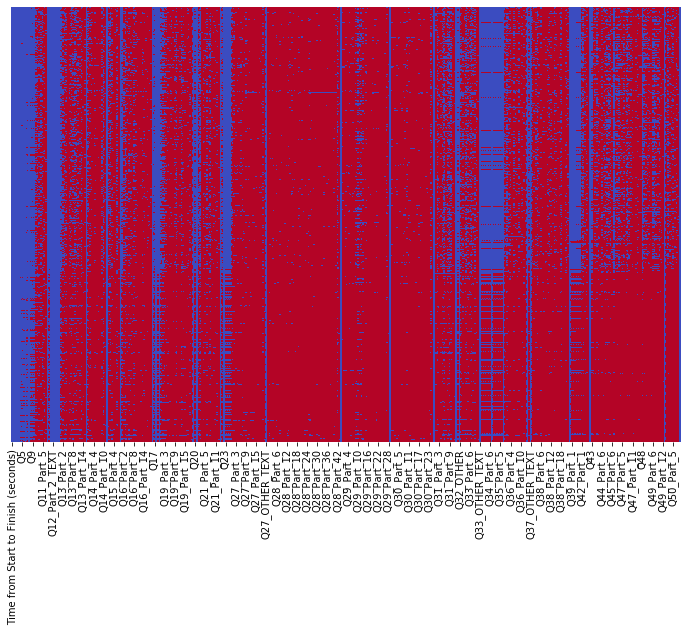

In [12]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(multiplechoiceresponse.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

#### The heatmap above is a visual representation of how much null values are in each columns(red colour signifies missing, blue colour signifies not missing). 


### Alloting multiple choice questions to binary values

#### It is observed that most of the columns having null values have ( _ Part _ ) in the questions asked. They are multiple choice questions and we are going to allot the rows of these columns to binary values. The rows with null values will be 0 and the rows with selected reponse will be 1

In [13]:
multiplechoice = multiplechoiceresponse.columns.str.contains('_Part_')
multiplechoice

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True,  True,  True,  True,
        True,  True,  True, False, False,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False, False,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False, False, False,
       False, False,

In [14]:
multiplechoiceresponse.loc[:, multiplechoice ] = multiplechoiceresponse.loc[:, multiplechoice].notna().astype(int)

#### That being done, lets see how much null values are in the dataset

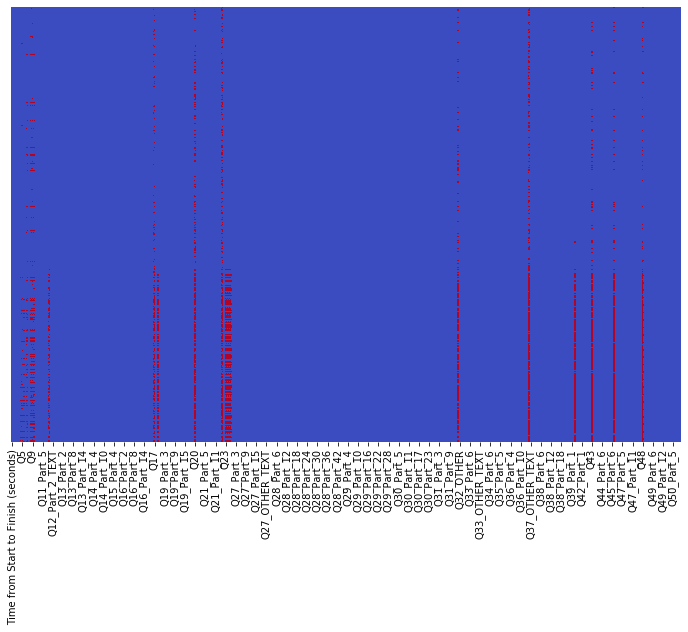

In [15]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(multiplechoiceresponse.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

In [16]:
# Checking the percentage of missing value after treating the multiple choice questions
nulls_after_treating_multiplechoice = multiplechoiceresponse.isnull().sum()
percentage_nulls_after_treating_multiplechoice= nulls_after_treating_multiplechoice / len(multiplechoiceresponse) * 100
percentage_nulls_after_treating_multiplechoice.sort_values(ascending=False)

Q37                                    59.467728
Q22                                    48.931266
Q20                                    45.557418
Q43                                    45.012573
Q46                                    44.300084
Q48                                    43.968986
Q32                                    41.831517
Q17                                    36.198659
Q40                                    33.445096
Q26                                    22.544007
Q25                                    22.497904
Q24                                    22.321878
Q23                                    22.263202
Q18                                    21.253143
Q12_MULTIPLE_CHOICE                    19.534786
Q9                                     15.398156
Q10                                    13.369656
Q8                                     11.559095
Q7                                      9.111484
Q6                                      4.019279
Q5                  

#### After treating the multiple choice questions, it is evident from the output about that there are still some columns with null values and further cleaning has to be done.

### Setting a threshold to remove column with missing values > or = 80%

In [17]:
mcrdf = multiplechoiceresponse.loc[:, multiplechoiceresponse.isnull().mean() < .8]

#https://stackoverflow.com/questions/43311555/how-to-drop-column-according-to-nan-percentage-for-dataframe/43311729#43311729

### After exploring the dataset it is discovered that respondents that filled the survey in less than 45 seconds barely got through to the target questions (level of formal education, undergraduate major, job role, salary range) used for our analysis. 

In [18]:
#convert 'Time from Start to Finish (seconds)' column to float
mcrdf['Time from Start to Finish (seconds)'] = mcrdf['Time from Start to Finish (seconds)'][1:].astype(float)

In [19]:
#Filtering rows with less than 45 seconds in column - 'Time from Start to Finish -seconds-'
mcrdf[mcrdf['Time from Start to Finish (seconds)'] < 45 ]

Time from Start to Finish (seconds)                 Q1 Q1_OTHER_TEXT  \
13261                                 37.0               Male            -1   
14398                                 39.0               Male            -1   
14415                                 42.0               Male            -1   
14423                                 44.0             Female            -1   
14625                                 38.0             Female            -1   
14642                                 31.0               Male            -1   
14684                                 28.0               Male            -1   
14692                                 43.0               Male            -1   
14706                                 29.0               Male            -1   
14749                                 29.0               Male            -1   
14754                                 34.0             Female            -1   
14781                                 16.0               Male            -1   
14804                                 39.0               Male            -1   
14874                                 34.0  Prefer not to say            -1   
14918                                 28.0               Male            -1   
14992                                 35.0               Male            -1   
15098                                 23.0               Male            -1   
15101                                 41.0               Male            -1   
15104                                 28.0               Male            -1   
15128                                 42.0             Female            -1   
15159                                 36.0               Male            -1   
15213                                 17.0               Male            -1   
15219                                 20.0               Male            -1   
15274                                 32.0               Male            -1   
15278                                 36.0               Male            -1   
15284                                 42.0               Male            -1   
15290                                 38.0               Male            -1   
15372                                 24.0               Male            -1   
15437                                 31.0               Male            -1   
15475                                 43.0               Male            -1   
15476                                 41.0  Prefer not to say            -1   
15533                                 30.0               Male            -1   
15640                                 32.0               Male            -1   
15663                                 43.0               Male            -1   
15670                                 34.0               Male            -1   
15741                                 44.0               Male            -1   
15745                                 35.0               Male            -1   
15746                                 28.0               Male            -1   
15865                                 23.0               Male            -1   
15900                                 43.0               Male            -1   
15923                                 27.0             Female            -1   
15959                                 33.0               Male            -1   
16018                                 31.0               Male            -1   
16032                                 36.0               Male            -1   
16062                                 29.0               Male            -1   
16083                                 19.0               Male            -1   
16101                                 24.0             Female            -1   
16102                                 27.0               Male            -1   
16118                                 35.0               Male            -1   
16121                                 37.0               

#### From the output above, it is apparent that the respondents that filled the survey in less than 45 seconds left a portion of the question empty, because the probably didn't get to through the survey.

#### Now, we're going to remove the rows with value less than 45 seconds in the column - 'Time from Start to Finish -seconds-'

In [20]:
mcrdf.drop(mcrdf[mcrdf['Time from Start to Finish (seconds)'] < 45].index, inplace = True) 
# Source; https://www.geeksforgeeks.org/drop-rows-from-the-dataframe-based-on-certain-condition-applied-on-a-column/

### Dropping Columns that contains insignificant response

#### While filtering out the rows with values less than 45 seconds in the column - 'Time from Start to Finish -seconds-', i observed some of the columns had '-1', '0' or some other random figures. And these are not the multiple choice questions. We're going to filter these out next to shed more light on what they are

##### Applying multiple column filter

In [21]:
multiplechoiceresponse.filter(regex='Q32_|OTHER_TEXT|Q12_Part')

Q1_OTHER_TEXT  \
0      What is your gender? - Prefer to self-describe - Text   
1                                                         -1   
2                                                         -1   
3                                                         -1   
4                                                         -1   
...                                                      ...   
23855                                                     -1   
23856                                                     -1   
23857                                                     -1   
23858                                                     -1   
23859                                                     -1   

                                                                         Q6_OTHER_TEXT  \
0      Select the title most similar to your current role (or most recent title if ...   
1                                                                                   -1   
2                                                                                    0   
3                                                                                   -1   
4                                                                                   -1   
...                                                                                ...   
23855                                                                               -1   
23856                                                                               -1   
23857                                                                               -1   
23858                                                                               -1   
23859                                                                               -1   

                                                                         Q7_OTHER_TEXT  \
0      In what industry is your current employer/contract (or your most recent empl...   
1                                                                                    0   
2                                                                                   -1   
3                                                                                   -1   
4                                                                                   -1   
...                                                                                ...   
23855                                                                               -1   
23856                                                                               -1   
23857                                                                               -1   
23858                                                                               -1   
23859                                                                               -1   

                                                                        Q11_OTHER_TEXT  \
0      Select any activities that make up an important part of your role at work: (...   
1                                                                                   -1   
2                                                                                   -1   
3                                                                                   -1   
4                                                                                   -1   
...                                                                                ...   
23855                                                                               -1   
23856                                                                               -1   
23857                                                                               -1   
23858                                                                               -1   
23859                                                                               -1   

      Q12_Part_1_TEXT Q12_Part_2_TE

##### Dropping multiple columns with insignificant responses

In [22]:
#columns to drop
mcrdf.drop(list(mcrdf.filter(regex = 'Q32_|OTHER_TEXT|Q12_Part')), axis = 1, inplace = True)
#https://stackoverflow.com/questions/50286883/how-to-apply-multiple-column-filterstring-in-python

### Dropping rows missing target variable

#### Dropping null rows for Q4, Q7 and Q9  because it is observed that respondonts having missing value for one of this columns most likely didn't fill the following columns listed below
##### Q4; What is the highest level of formal education that you have attained?
##### Q7; In what industry is your current employer/contract?
##### Q9; What is your current yearly compensation (approximate USD)?

In [23]:
#Removing null rows in selected columns
mcrdf= mcrdf.dropna(subset=['Q4','Q7','Q9'],how = 'any') 

#### Now, lets check the amount of missing values in each column in ascending order

In [24]:
# Checking number of null values in each column in ascending order
mcrdf.isnull().sum().sort_values(ascending=True)

Q29_Part_7                                 0
Q33_Part_3                                 0
Q33_Part_2                                 0
Q33_Part_1                                 0
Q31_Part_12                                0
Q31_Part_11                                0
Q31_Part_10                                0
Q31_Part_9                                 0
Q31_Part_8                                 0
Q33_Part_4                                 0
Q31_Part_7                                 0
Q31_Part_5                                 0
Q31_Part_4                                 0
Q31_Part_3                                 0
Q31_Part_2                                 0
Q31_Part_1                                 0
Q30_Part_25                                0
Q30_Part_24                                0
Q30_Part_23                                0
Q31_Part_6                                 0
Q30_Part_22                                0
Q33_Part_5                                 0
Q33_Part_7

In [25]:
mcrdf.shape

(20186, 360)

#### The next step is to fill in the missing values in the columns with sequence of ascending order of missing values

## Handing in Nan Values

#### There are different method of handling nan values, you can chose to drop them or fill them with mode or mean, or replacing with an "Other" value. For this section, i have chosen to fill the nan values with the mode because most columns of the dataset are contains are 'strings', replacing the nan value with mean or median would not suitable in this case.

#### Nan values were filled with the mode of the columns using a GroupBy Function. Trying to fill the missing values without this function Filling in the NaN Values without the groupby function would increase the bias and variance. This would be done in a logical way by looking at the relations between the questions asked in the columns with nan values. The benefit of replacing the nan values instead of deleting it entirely is that it prevent the information loss of rows which might be vital, on the downside.

## Filling nan values for Q8; How many years of experience do you have in your current role?

In [26]:
#determine mode of Q8; Years of Job Experience Column in relation to Q2; Age in #years

Q8df = mcrdf.groupby('Q2')['Q8'].apply(lambda x: x.mode().iat[0]).reset_index()
print(Q8df)

                             Q2  \
0                         18-21   
1                         22-24   
2                         25-29   
3                         30-34   
4                         35-39   
5                         40-44   
6                         45-49   
7                         50-54   
8                         55-59   
9                         60-69   
10                        70-79   
11                          80+   
12  What is your age (# years)?   

                                                                Q8  
0                                                              0-1  
1                                                              0-1  
2                                                              0-1  
3                                                             5-10  
4                                                            10-15  
5                                                            10-15  
6                         

In [27]:
# fill Q8 with mode
mcrdf.loc[mcrdf.Q8.isna(), 'Q8'] = mcrdf.Q2.map(Q8df.set_index('Q2')['Q8'])


In [28]:
mcrdf[mcrdf.Q8.isnull()] #Checking if we succesfully filled nan values

Empty DataFrame
Columns: [Time from Start to Finish (seconds), Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10, Q11_Part_1, Q11_Part_2, Q11_Part_3, Q11_Part_4, Q11_Part_5, Q11_Part_6, Q11_Part_7, Q12_MULTIPLE_CHOICE, Q13_Part_1, Q13_Part_2, Q13_Part_3, Q13_Part_4, Q13_Part_5, Q13_Part_6, Q13_Part_7, Q13_Part_8, Q13_Part_9, Q13_Part_10, Q13_Part_11, Q13_Part_12, Q13_Part_13, Q13_Part_14, Q13_Part_15, Q14_Part_1, Q14_Part_2, Q14_Part_3, Q14_Part_4, Q14_Part_5, Q14_Part_6, Q14_Part_7, Q14_Part_8, Q14_Part_9, Q14_Part_10, Q14_Part_11, Q15_Part_1, Q15_Part_2, Q15_Part_3, Q15_Part_4, Q15_Part_5, Q15_Part_6, Q15_Part_7, Q16_Part_1, Q16_Part_2, Q16_Part_3, Q16_Part_4, Q16_Part_5, Q16_Part_6, Q16_Part_7, Q16_Part_8, Q16_Part_9, Q16_Part_10, Q16_Part_11, Q16_Part_12, Q16_Part_13, Q16_Part_14, Q16_Part_15, Q16_Part_16, Q16_Part_17, Q16_Part_18, Q17, Q18, Q19_Part_1, Q19_Part_2, Q19_Part_3, Q19_Part_4, Q19_Part_5, Q19_Part_6, Q19_Part_7, Q19_Part_8, Q19_Part_9, Q19_Part_10, Q19_Part_11, Q19_Part_12, Q19_Part_13, Q19_Part_14, Q19_Part_15, Q19_Part_16, Q19_Part_17, Q19_Part_18, Q19_Part_19, Q20, Q21_Part_1, Q21_Part_2, Q21_Part_3, Q21_Part_4, Q21_Part_5, Q21_Part_6, Q21_Part_7, Q21_Part_8, Q21_Part_9, Q21_Part_10, Q21_Part_11, Q21_Part_12, Q21_Part_13, Q22, Q23, Q24, Q25, Q26, Q27_Part_1, Q27_Part_2, Q27_Part_3, Q27_Part_4, Q27_Part_5, Q27_Part_6, Q27_Part_7, Q27_Part_8, Q27_Part_9, Q27_Part_10, Q27_Part_11, Q27_Part_12, Q27_Part_13, Q27_Part_14, Q27_Part_15, Q27_Part_16, Q27_Part_17, Q27_Part_18, Q27_Part_19, Q27_Part_20, Q28_Part_1, Q28_Part_2, Q28_Part_3, Q28_Part_4, Q28_Part_5, Q28_Part_6, Q28_Part_7, Q28_Part_8, Q28_Part_9, Q28_Part_10, Q28_Part_11, Q28_Part_12, Q28_Part_13, Q28_Part_14, Q28_Part_15, Q28_Part_16, Q28_Part_17, Q28_Part_18, Q28_Part_19, Q28_Part_20, ...]
Index: []

## Filling nan values for Q5; Which best describes your undergraduate major?

In [29]:
#determine mode of Q5 in relation to Q6; current job role  to fill in NAN Values
Q5df = (mcrdf.groupby('Q6')['Q5'].apply(lambda x: x.mode().iat[0]).reset_index())
Q5df

Q6  \
0                                                                  Business Analyst   
1                                                                     Chief Officer   
2                                                                        Consultant   
3                                                             DBA/Database Engineer   
4                                                                      Data Analyst   
5                                                                     Data Engineer   
6                                                                   Data Journalist   
7                                                                    Data Scientist   
8                                                                Developer Advocate   
9                                                                           Manager   
10                                                                Marketing Analyst   
11                                                                            Other   
12                                                           Principal Investigator   
13                                                          Product/Project Manager   
14                                                               Research Assistant   
15                                                               Research Scientist   
16                                                                      Salesperson   
17  Select the title most similar to your current role (or most recent title if ...   
18                                                                Software Engineer   
19                                                                     Statistician   
20                                                                          Student   

                                                                  Q5  
0       A business discipline (accounting, economics, finance, etc.)  
1                      Computer science (software engineering, etc.)  
2                      Computer science (software engineering, etc.)  
3                      Computer science (software engineering, etc.)  
4                      Computer science (software engineering, etc.)  
5                      Computer science (software engineering, etc.)  
6                      Computer science (software engineering, etc.)  
7                      Computer science (software engineering, etc.)  
8                      Computer science (software engineering, etc.)  
9                                 Engineering (non-computer focused)  
10      A business discipline (accounting, economics, finance, etc.)  
11                     Computer science (software engineering, etc.)  
12                     Computer science (software engineering, etc.)  
13                     Computer science (software engineering, etc.)  
14                     Computer science (software engineering, etc.)  
15                     Computer science (software engineering, etc.)  
16      A business discipline (accounting, economics, finance, etc.)  
17  Which best describes your undergraduate major? - Selected Choice  
18                     Computer science (software engineering, etc.)  
19                                         Mathematics or statistics  
20                     Computer science (software engineering, etc.)

In [30]:
# fill Q5 with mode
mcrdf.loc[mcrdf.Q5.isna(), 'Q5'] = mcrdf.Q6.map(Q5df.set_index('Q6')['Q5'])

In [31]:
mcrdf[mcrdf.Q5.isnull()] #Checking if we successfully filled nan values 

Empty DataFrame
Columns: [Time from Start to Finish (seconds), Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10, Q11_Part_1, Q11_Part_2, Q11_Part_3, Q11_Part_4, Q11_Part_5, Q11_Part_6, Q11_Part_7, Q12_MULTIPLE_CHOICE, Q13_Part_1, Q13_Part_2, Q13_Part_3, Q13_Part_4, Q13_Part_5, Q13_Part_6, Q13_Part_7, Q13_Part_8, Q13_Part_9, Q13_Part_10, Q13_Part_11, Q13_Part_12, Q13_Part_13, Q13_Part_14, Q13_Part_15, Q14_Part_1, Q14_Part_2, Q14_Part_3, Q14_Part_4, Q14_Part_5, Q14_Part_6, Q14_Part_7, Q14_Part_8, Q14_Part_9, Q14_Part_10, Q14_Part_11, Q15_Part_1, Q15_Part_2, Q15_Part_3, Q15_Part_4, Q15_Part_5, Q15_Part_6, Q15_Part_7, Q16_Part_1, Q16_Part_2, Q16_Part_3, Q16_Part_4, Q16_Part_5, Q16_Part_6, Q16_Part_7, Q16_Part_8, Q16_Part_9, Q16_Part_10, Q16_Part_11, Q16_Part_12, Q16_Part_13, Q16_Part_14, Q16_Part_15, Q16_Part_16, Q16_Part_17, Q16_Part_18, Q17, Q18, Q19_Part_1, Q19_Part_2, Q19_Part_3, Q19_Part_4, Q19_Part_5, Q19_Part_6, Q19_Part_7, Q19_Part_8, Q19_Part_9, Q19_Part_10, Q19_Part_11, Q19_Part_12, Q19_Part_13, Q19_Part_14, Q19_Part_15, Q19_Part_16, Q19_Part_17, Q19_Part_18, Q19_Part_19, Q20, Q21_Part_1, Q21_Part_2, Q21_Part_3, Q21_Part_4, Q21_Part_5, Q21_Part_6, Q21_Part_7, Q21_Part_8, Q21_Part_9, Q21_Part_10, Q21_Part_11, Q21_Part_12, Q21_Part_13, Q22, Q23, Q24, Q25, Q26, Q27_Part_1, Q27_Part_2, Q27_Part_3, Q27_Part_4, Q27_Part_5, Q27_Part_6, Q27_Part_7, Q27_Part_8, Q27_Part_9, Q27_Part_10, Q27_Part_11, Q27_Part_12, Q27_Part_13, Q27_Part_14, Q27_Part_15, Q27_Part_16, Q27_Part_17, Q27_Part_18, Q27_Part_19, Q27_Part_20, Q28_Part_1, Q28_Part_2, Q28_Part_3, Q28_Part_4, Q28_Part_5, Q28_Part_6, Q28_Part_7, Q28_Part_8, Q28_Part_9, Q28_Part_10, Q28_Part_11, Q28_Part_12, Q28_Part_13, Q28_Part_14, Q28_Part_15, Q28_Part_16, Q28_Part_17, Q28_Part_18, Q28_Part_19, Q28_Part_20, ...]
Index: []

## Filling nan values for Q10; Does your current employer incorporate machine learning methods into their business?

In [32]:
mcrdf['Q10'].value_counts(normalize=True)

We are exploring ML methods (and may one day put a model into production)                    0.229391
No (we do not use ML methods)                                                                0.216009
We recently started using ML methods (i.e., models in production for less than 2 years)      0.187767
We have well established ML methods (i.e., models in production for more than 2 years)       0.138052
I do not know                                                                                0.124415
We use ML methods for generating insights (but do not put working models into production)    0.104315
Does your current employer incorporate machine learning methods into their business?         0.000051
Name: Q10, dtype: float64

In [33]:
#determine the mode of Q10 according to industry of current employer/contract
Q10df = (mcrdf.groupby('Q7')['Q10'].apply(lambda x: x.mode().iat[0]).reset_index())
Q10df

Q7  \
0                                                               Academics/Education   
1                                                                Accounting/Finance   
2                                                       Broadcasting/Communications   
3                                                              Computers/Technology   
4                                                                     Energy/Mining   
5                                                         Government/Public Service   
6                                                  Hospitality/Entertainment/Sports   
7                                                                    I am a student   
8   In what industry is your current employer/contract (or your most recent empl...   
9                                                         Insurance/Risk Assessment   
10                                                        Manufacturing/Fabrication   
11                                                                    Marketing/CRM   
12                                                           Medical/Pharmaceutical   
13                                                        Military/Security/Defense   
14                                                               Non-profit/Service   
15                                             Online Business/Internet-based Sales   
16                                           Online Service/Internet-based Services   
17                                                                            Other   
18                                                                     Retail/Sales   
19                                                          Shipping/Transportation   

                                                                                Q10  
0         We are exploring ML methods (and may one day put a model into production)  
1         We are exploring ML methods (and may one day put a model into production)  
2   We recently started using ML methods (i.e., models in production for less th...  
3         We are exploring ML methods (and may one day put a model into production)  
4   We recently started using ML methods (i.e., models in production for less th...  
5                                                     No (we do not use ML methods)  
6                                                     No (we do not use ML methods)  
7                                                                     I do not know  
8   Does your current employer incorporate machine learning methods into their b...  
9   We recently started using ML methods (i.e., models in production for less th...  
10                                                    No (we do not use ML methods)  
11                                                    No (we do not use ML methods)  
12        We are exploring ML methods (and may one day put a model into production)  
13        We are exploring ML methods (and may one day put a model into production)  
14                                                    No (we do not use ML methods)  
15  We recently started using ML methods (i.e., models in production for less th...  
16  We recently started using ML methods (i.e., models in production for less th...  
17                                                    No (we do not use ML methods)  
18                                                    No (we do not use ML methods)  
19  We recently started using ML methods (i.e., models in production for less th...

In [34]:
# fill Q10 with mode
mcrdf.loc[mcrdf.Q10.isna(), 'Q10'] = mcrdf.Q7.map(Q10df.set_index('Q7')['Q10'])

## Filling nan values for Q12; What is the primary tool that you use at work or school to analyze data?

In [35]:
#determine mode of Q12: primary tool that you use at work or school to analyze data according to Q6 title most similar to current role 
Q12_multiple_choice_df = (mcrdf.groupby('Q6')['Q12_MULTIPLE_CHOICE'].apply(lambda x: x.mode().iat[0]).reset_index())
Q12_multiple_choice_df

Q6  \
0                                                                  Business Analyst   
1                                                                     Chief Officer   
2                                                                        Consultant   
3                                                             DBA/Database Engineer   
4                                                                      Data Analyst   
5                                                                     Data Engineer   
6                                                                   Data Journalist   
7                                                                    Data Scientist   
8                                                                Developer Advocate   
9                                                                           Manager   
10                                                                Marketing Analyst   
11                                                                            Other   
12                                                           Principal Investigator   
13                                                          Product/Project Manager   
14                                                               Research Assistant   
15                                                               Research Scientist   
16                                                                      Salesperson   
17  Select the title most similar to your current role (or most recent title if ...   
18                                                                Software Engineer   
19                                                                     Statistician   
20                                                                          Student   

                                                                Q12_MULTIPLE_CHOICE  
0                 Basic statistical software (Microsoft Excel, Google Sheets, etc.)  
1              Local or hosted development environments (RStudio, JupyterLab, etc.)  
2              Local or hosted development environments (RStudio, JupyterLab, etc.)  
3              Local or hosted development environments (RStudio, JupyterLab, etc.)  
4              Local or hosted development environments (RStudio, JupyterLab, etc.)  
5              Local or hosted development environments (RStudio, JupyterLab, etc.)  
6              Local or hosted development environments (RStudio, JupyterLab, etc.)  
7              Local or hosted development environments (RStudio, JupyterLab, etc.)  
8                 Basic statistical software (Microsoft Excel, Google Sheets, etc.)  
9              Local or hosted development environments (RStudio, JupyterLab, etc.)  
10                Basic statistical software (Microsoft Excel, Google Sheets, etc.)  
11                Basic statistical software (Microsoft Excel, Google Sheets, etc.)  
12             Local or hosted development environments (RStudio, JupyterLab, etc.)  
13                Basic statistical software (Microsoft Excel, Google Sheets, etc.)  
14             Local or hosted development environments (RStudio, JupyterLab, etc.)  
15             Local or hosted development environments (RStudio, JupyterLab, etc.)  
16                Basic statistical software (Microsoft Excel, Google Sheets, etc.)  
17  What is the primary tool that you use at work or school to analyze data? (in...  
18             Local or hosted development environments (RStudio, JupyterLab, etc.)  
19             Local or hosted development environments (RStudio, JupyterLab, etc.)  
20             Local or hosted development environments (RStudio, JupyterLab, etc.)

In [36]:
# fill Q12 with mode
mcrdf.loc[mcrdf.Q12_MULTIPLE_CHOICE.isna(), 'Q12_MULTIPLE_CHOICE'] = mcrdf.Q6.map(Q12_multiple_choice_df.set_index('Q6')['Q12_MULTIPLE_CHOICE'])

In [37]:
mcrdf[mcrdf.Q12_MULTIPLE_CHOICE.isnull()]

Empty DataFrame
Columns: [Time from Start to Finish (seconds), Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10, Q11_Part_1, Q11_Part_2, Q11_Part_3, Q11_Part_4, Q11_Part_5, Q11_Part_6, Q11_Part_7, Q12_MULTIPLE_CHOICE, Q13_Part_1, Q13_Part_2, Q13_Part_3, Q13_Part_4, Q13_Part_5, Q13_Part_6, Q13_Part_7, Q13_Part_8, Q13_Part_9, Q13_Part_10, Q13_Part_11, Q13_Part_12, Q13_Part_13, Q13_Part_14, Q13_Part_15, Q14_Part_1, Q14_Part_2, Q14_Part_3, Q14_Part_4, Q14_Part_5, Q14_Part_6, Q14_Part_7, Q14_Part_8, Q14_Part_9, Q14_Part_10, Q14_Part_11, Q15_Part_1, Q15_Part_2, Q15_Part_3, Q15_Part_4, Q15_Part_5, Q15_Part_6, Q15_Part_7, Q16_Part_1, Q16_Part_2, Q16_Part_3, Q16_Part_4, Q16_Part_5, Q16_Part_6, Q16_Part_7, Q16_Part_8, Q16_Part_9, Q16_Part_10, Q16_Part_11, Q16_Part_12, Q16_Part_13, Q16_Part_14, Q16_Part_15, Q16_Part_16, Q16_Part_17, Q16_Part_18, Q17, Q18, Q19_Part_1, Q19_Part_2, Q19_Part_3, Q19_Part_4, Q19_Part_5, Q19_Part_6, Q19_Part_7, Q19_Part_8, Q19_Part_9, Q19_Part_10, Q19_Part_11, Q19_Part_12, Q19_Part_13, Q19_Part_14, Q19_Part_15, Q19_Part_16, Q19_Part_17, Q19_Part_18, Q19_Part_19, Q20, Q21_Part_1, Q21_Part_2, Q21_Part_3, Q21_Part_4, Q21_Part_5, Q21_Part_6, Q21_Part_7, Q21_Part_8, Q21_Part_9, Q21_Part_10, Q21_Part_11, Q21_Part_12, Q21_Part_13, Q22, Q23, Q24, Q25, Q26, Q27_Part_1, Q27_Part_2, Q27_Part_3, Q27_Part_4, Q27_Part_5, Q27_Part_6, Q27_Part_7, Q27_Part_8, Q27_Part_9, Q27_Part_10, Q27_Part_11, Q27_Part_12, Q27_Part_13, Q27_Part_14, Q27_Part_15, Q27_Part_16, Q27_Part_17, Q27_Part_18, Q27_Part_19, Q27_Part_20, Q28_Part_1, Q28_Part_2, Q28_Part_3, Q28_Part_4, Q28_Part_5, Q28_Part_6, Q28_Part_7, Q28_Part_8, Q28_Part_9, Q28_Part_10, Q28_Part_11, Q28_Part_12, Q28_Part_13, Q28_Part_14, Q28_Part_15, Q28_Part_16, Q28_Part_17, Q28_Part_18, Q28_Part_19, Q28_Part_20, ...]
Index: []

## Filling nan values for Q18; What programming language would you recommend an aspiring data scientist to learn first?

In [38]:
#determine mode of Q18 according to Q7; industry of current employer/contract
Q18df = (mcrdf.groupby('Q7')['Q18'].apply(lambda x: x.mode().iat[0]).reset_index())
Q18df

Q7  \
0                                                               Academics/Education   
1                                                                Accounting/Finance   
2                                                       Broadcasting/Communications   
3                                                              Computers/Technology   
4                                                                     Energy/Mining   
5                                                         Government/Public Service   
6                                                  Hospitality/Entertainment/Sports   
7                                                                    I am a student   
8   In what industry is your current employer/contract (or your most recent empl...   
9                                                         Insurance/Risk Assessment   
10                                                        Manufacturing/Fabrication   
11                                                                    Marketing/CRM   
12                                                           Medical/Pharmaceutical   
13                                                        Military/Security/Defense   
14                                                               Non-profit/Service   
15                                             Online Business/Internet-based Sales   
16                                           Online Service/Internet-based Services   
17                                                                            Other   
18                                                                     Retail/Sales   
19                                                          Shipping/Transportation   

                                                                                Q18  
0                                                                            Python  
1                                                                            Python  
2                                                                            Python  
3                                                                            Python  
4                                                                            Python  
5                                                                            Python  
6                                                                            Python  
7                                                                            Python  
8   What programming language would you recommend an aspiring data scientist to ...  
9                                                                            Python  
10                                                                           Python  
11                                                                           Python  
12                                                                           Python  
13                                                                           Python  
14                                                                           Python  
15                                                                           Python  
16                                                                           Python  
17                                                                           Python  
18                                                                           Python  
19                                                                           Python

In [39]:
#fill Q18 with mode
mcrdf.loc[mcrdf.Q18.isna(),'Q18'] = mcrdf.Q7.map(Q18df.set_index('Q7')['Q18'])

## Filling nan values for Q23; Approximately what percent of your time at work or school is spent actively coding?

In [40]:
#determine mode of Q18 according to Q6; title most similar to current role
Q23df = (mcrdf.groupby('Q6')['Q23'].apply(lambda x: x.mode().iat[0]).reset_index())
Q23df

Q6  \
0                                                                  Business Analyst   
1                                                                     Chief Officer   
2                                                                        Consultant   
3                                                             DBA/Database Engineer   
4                                                                      Data Analyst   
5                                                                     Data Engineer   
6                                                                   Data Journalist   
7                                                                    Data Scientist   
8                                                                Developer Advocate   
9                                                                           Manager   
10                                                                Marketing Analyst   
11                                                                            Other   
12                                                           Principal Investigator   
13                                                          Product/Project Manager   
14                                                               Research Assistant   
15                                                               Research Scientist   
16                                                                      Salesperson   
17  Select the title most similar to your current role (or most recent title if ...   
18                                                                Software Engineer   
19                                                                     Statistician   
20                                                                          Student   

                                                                                Q23  
0                                                              1% to 25% of my time  
1                                                              1% to 25% of my time  
2                                                              1% to 25% of my time  
3                                                              1% to 25% of my time  
4                                                             50% to 74% of my time  
5                                                             50% to 74% of my time  
6                                                              1% to 25% of my time  
7                                                             50% to 74% of my time  
8                                                             50% to 74% of my time  
9                                                              1% to 25% of my time  
10                                                             1% to 25% of my time  
11                                                             1% to 25% of my time  
12                                                             1% to 25% of my time  
13                                                             1% to 25% of my time  
14                                                            50% to 74% of my time  
15                                                            25% to 49% of my time  
16                                                             1% to 25% of my time  
17  Approximately what percent of your time at work or school is spent actively ...  
18                                                            50% to 74% of my time  
19                                                            25% to 49% of my time  
20                                                            25% to 49% of my time

In [41]:
#fill Q23 with mode
mcrdf.loc[mcrdf.Q23.isna(), 'Q23'] = mcrdf.Q6.map(Q23df.set_index('Q6')['Q23'])

In [42]:
mcrdf[mcrdf.Q23.isnull()]

Empty DataFrame
Columns: [Time from Start to Finish (seconds), Q1, Q2, Q3, Q4, Q5, Q6, Q7, Q8, Q9, Q10, Q11_Part_1, Q11_Part_2, Q11_Part_3, Q11_Part_4, Q11_Part_5, Q11_Part_6, Q11_Part_7, Q12_MULTIPLE_CHOICE, Q13_Part_1, Q13_Part_2, Q13_Part_3, Q13_Part_4, Q13_Part_5, Q13_Part_6, Q13_Part_7, Q13_Part_8, Q13_Part_9, Q13_Part_10, Q13_Part_11, Q13_Part_12, Q13_Part_13, Q13_Part_14, Q13_Part_15, Q14_Part_1, Q14_Part_2, Q14_Part_3, Q14_Part_4, Q14_Part_5, Q14_Part_6, Q14_Part_7, Q14_Part_8, Q14_Part_9, Q14_Part_10, Q14_Part_11, Q15_Part_1, Q15_Part_2, Q15_Part_3, Q15_Part_4, Q15_Part_5, Q15_Part_6, Q15_Part_7, Q16_Part_1, Q16_Part_2, Q16_Part_3, Q16_Part_4, Q16_Part_5, Q16_Part_6, Q16_Part_7, Q16_Part_8, Q16_Part_9, Q16_Part_10, Q16_Part_11, Q16_Part_12, Q16_Part_13, Q16_Part_14, Q16_Part_15, Q16_Part_16, Q16_Part_17, Q16_Part_18, Q17, Q18, Q19_Part_1, Q19_Part_2, Q19_Part_3, Q19_Part_4, Q19_Part_5, Q19_Part_6, Q19_Part_7, Q19_Part_8, Q19_Part_9, Q19_Part_10, Q19_Part_11, Q19_Part_12, Q19_Part_13, Q19_Part_14, Q19_Part_15, Q19_Part_16, Q19_Part_17, Q19_Part_18, Q19_Part_19, Q20, Q21_Part_1, Q21_Part_2, Q21_Part_3, Q21_Part_4, Q21_Part_5, Q21_Part_6, Q21_Part_7, Q21_Part_8, Q21_Part_9, Q21_Part_10, Q21_Part_11, Q21_Part_12, Q21_Part_13, Q22, Q23, Q24, Q25, Q26, Q27_Part_1, Q27_Part_2, Q27_Part_3, Q27_Part_4, Q27_Part_5, Q27_Part_6, Q27_Part_7, Q27_Part_8, Q27_Part_9, Q27_Part_10, Q27_Part_11, Q27_Part_12, Q27_Part_13, Q27_Part_14, Q27_Part_15, Q27_Part_16, Q27_Part_17, Q27_Part_18, Q27_Part_19, Q27_Part_20, Q28_Part_1, Q28_Part_2, Q28_Part_3, Q28_Part_4, Q28_Part_5, Q28_Part_6, Q28_Part_7, Q28_Part_8, Q28_Part_9, Q28_Part_10, Q28_Part_11, Q28_Part_12, Q28_Part_13, Q28_Part_14, Q28_Part_15, Q28_Part_16, Q28_Part_17, Q28_Part_18, Q28_Part_19, Q28_Part_20, ...]
Index: []

## Filling nan values for Q24; How long have you been writing code to analyze data?

In [43]:
#determine mode of Q24 according to Q8; how many years of experience do you have in your current role ?
Q24df = (mcrdf.groupby('Q8')['Q24'].apply(lambda x: x.mode().iat[0]).reset_index())
Q24df

Q8  \
0                                                              0-1   
1                                                              1-2   
2                                                            10-15   
3                                                            15-20   
4                                                              2-3   
5                                                            20-25   
6                                                            25-30   
7                                                              3-4   
8                                                             30 +   
9                                                              4-5   
10                                                            5-10   
11  How many years of experience do you have in your current role?   

                                                     Q24  
0                                               < 1 year  
1                                              1-2 years  
2                                            10-20 years  
3                                              1-2 years  
4                                              1-2 years  
5                                            20-30 years  
6                                            20-30 years  
7                                              3-5 years  
8                                            30-40 years  
9                                              3-5 years  
10                                            5-10 years  
11  How long have you been writing code to analyze data?

In [44]:
#fill Q24 with mode
mcrdf.loc[mcrdf.Q24.isna(),'Q24'] = mcrdf.Q8.map(Q24df.set_index('Q8')['Q24'])

## Filling nan values for Q25; For how many years have you used machine learning methods (at work or in school)? 

In [45]:
#determine mode of Q25 according to Q24; How long have you been writing code to analyze data?
Q25df = (mcrdf.groupby('Q24')['Q25'].apply(lambda x: x.mode().iat[0]).reset_index())
Q25df

Q24  \
0                                              1-2 years   
1                                            10-20 years   
2                                            20-30 years   
3                                              3-5 years   
4                                            30-40 years   
5                                              40+ years   
6                                             5-10 years   
7                                               < 1 year   
8   How long have you been writing code to analyze data?   
9   I have never written code and I do not want to learn   
10         I have never written code but I want to learn   

                                                                                Q25  
0                                                                         1-2 years  
1                                                                        5-10 years  
2                                                                         20+ years  
3                                                                         1-2 years  
4                                                                         20+ years  
5                                                                         20+ years  
6                                                                        5-10 years  
7                                                                          < 1 year  
8   For how many years have you used machine learning methods (at work or in sch...  
9                        I have never studied machine learning and I do not plan to  
10            I have never studied machine learning but plan to learn in the future

In [46]:
#fill Q25 with mode
mcrdf.loc[mcrdf.Q25.isna(),'Q25'] = mcrdf.Q24.map(Q25df.set_index('Q24')['Q25'])

## Filling nan values for Q26; Do you consider yourself to be a data scientist?

In [47]:
#determine mode of Q26 according to Q24; How long have you been writing code to analyze data?
Q26df = (mcrdf.groupby('Q6')['Q26'].apply(lambda x: x.mode().iat[0]).reset_index())
Q26df

Q6  \
0                                                                  Business Analyst   
1                                                                     Chief Officer   
2                                                                        Consultant   
3                                                             DBA/Database Engineer   
4                                                                      Data Analyst   
5                                                                     Data Engineer   
6                                                                   Data Journalist   
7                                                                    Data Scientist   
8                                                                Developer Advocate   
9                                                                           Manager   
10                                                                Marketing Analyst   
11                                                                            Other   
12                                                           Principal Investigator   
13                                                          Product/Project Manager   
14                                                               Research Assistant   
15                                                               Research Scientist   
16                                                                      Salesperson   
17  Select the title most similar to your current role (or most recent title if ...   
18                                                                Software Engineer   
19                                                                     Statistician   
20                                                                          Student   

                                                 Q26  
0                                       Probably not  
1                                     Definitely yes  
2                                       Probably yes  
3                                       Probably yes  
4                                       Probably yes  
5                                       Probably yes  
6                                     Definitely yes  
7                                     Definitely yes  
8                                              Maybe  
9                                              Maybe  
10                                             Maybe  
11                                             Maybe  
12                                    Definitely yes  
13                                      Probably not  
14                                      Probably yes  
15                                      Probably yes  
16                                      Probably not  
17  Do you consider yourself to be a data scientist?  
18                                      Probably not  
19                                      Probably yes  
20                                             Maybe

In [48]:
#fill Q26 with mode
mcrdf.loc[mcrdf.Q26.isna(),'Q26'] = mcrdf.Q6.map(Q26df.set_index('Q6')['Q26'])

## Filling nan values for Q40; Which better demonstrates expertise in data science: academic achievements or independent projects? 

In [49]:
#determine mode of Q40 according to Q6; Select the title most similar to your current role?
Q40df = (mcrdf.groupby('Q6')['Q40'].apply(lambda x: x.mode().iat[0]).reset_index())
Q40df

Q6  \
0                                                                  Business Analyst   
1                                                                     Chief Officer   
2                                                                        Consultant   
3                                                             DBA/Database Engineer   
4                                                                      Data Analyst   
5                                                                     Data Engineer   
6                                                                   Data Journalist   
7                                                                    Data Scientist   
8                                                                Developer Advocate   
9                                                                           Manager   
10                                                                Marketing Analyst   
11                                                                            Other   
12                                                           Principal Investigator   
13                                                          Product/Project Manager   
14                                                               Research Assistant   
15                                                               Research Scientist   
16                                                                      Salesperson   
17  Select the title most similar to your current role (or most recent title if ...   
18                                                                Software Engineer   
19                                                                     Statistician   
20                                                                          Student   

                                                                                Q40  
0           Independent projects are much more important than academic achievements  
1           Independent projects are much more important than academic achievements  
2           Independent projects are much more important than academic achievements  
3           Independent projects are much more important than academic achievements  
4           Independent projects are much more important than academic achievements  
5           Independent projects are much more important than academic achievements  
6           Independent projects are much more important than academic achievements  
7       Independent projects are slightly more important than academic achievements  
8           Independent projects are much more important than academic achievements  
9           Independent projects are much more important than academic achievements  
10      Independent projects are slightly more important than academic achievements  
11          Independent projects are much more important than academic achievements  
12      Independent projects are slightly more important than academic achievements  
13          Independent projects are much more important than academic achievements  
14              Independent projects are equally important as academic achievements  
15              Independent projects are equally important as academic achievements  
16      Independent projects are slightly more important than academic achievements  
17  Which better demonstrates expertise in data science: academic achievements o...  
18          Independent projects are much more important than academic achievements  
19              Independent projects are equally important as academic achievements  
20              Independent projects are equally important as academic achievements

In [50]:
#fill Q40 with mode
mcrdf.loc[mcrdf.Q40.isna(),'Q40'] = mcrdf.Q6.map(Q40df.set_index('Q6')['Q40'])

## Filling nan values for Q17; What specific programming language do you use most often?

In [51]:
#determine mode of Q17 according to Q18; What programming language would you recommend an aspiring data scientist to learn first
Q17df = (mcrdf.groupby('Q18')['Q17'].apply(lambda x: x.mode().iat[0]).reset_index())
Q17df

Q18  \
0                                                                               C++   
1                                                                                Go   
2                                                                              Java   
3                                                                        Javascript   
4                                                                            MATLAB   
5                                                                              None   
6                                                                             Other   
7                                                                            Python   
8                                                                                 R   
9                                                                               SAS   
10                                                                              SQL   
11                                                                            Scala   
12                                                                              VBA   
13  What programming language would you recommend an aspiring data scientist to ...   

                                                                            Q17  
0                                                                        Python  
1                                                                            Go  
2                                                                          Java  
3                                                         Javascript/Typescript  
4                                                                        Python  
5                                                                          Java  
6                                                                        Python  
7                                                                        Python  
8                                                                             R  
9                                                                     SAS/STATA  
10                                                                          SQL  
11                                                                       Python  
12                                                                       Python  
13  What specific programming language do you use most often? - Selected Choice

In [52]:
#fill Q40 with mode
mcrdf.loc[mcrdf.Q17.isna(),'Q17'] = mcrdf.Q18.map(Q17df.set_index('Q18')['Q17'])

## Filling nan values for Q32; What is the type of data that you currently interact with most often at work or school?

In [53]:
#determine mode of Q32 according to Q6; Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q32df = (mcrdf.groupby('Q6')['Q32'].apply(lambda x: x.mode().iat[0]).reset_index())
Q32df

Q6  \
0                                                                  Business Analyst   
1                                                                     Chief Officer   
2                                                                        Consultant   
3                                                             DBA/Database Engineer   
4                                                                      Data Analyst   
5                                                                     Data Engineer   
6                                                                   Data Journalist   
7                                                                    Data Scientist   
8                                                                Developer Advocate   
9                                                                           Manager   
10                                                                Marketing Analyst   
11                                                                            Other   
12                                                           Principal Investigator   
13                                                          Product/Project Manager   
14                                                               Research Assistant   
15                                                               Research Scientist   
16                                                                      Salesperson   
17  Select the title most similar to your current role (or most recent title if ...   
18                                                                Software Engineer   
19                                                                     Statistician   
20                                                                          Student   

                                                                                Q32  
0                                                                    Numerical Data  
1                                                                    Numerical Data  
2                                                                    Numerical Data  
3                                                                      Tabular Data  
4                                                                    Numerical Data  
5                                                                      Tabular Data  
6                                                                         Text Data  
7                                                                      Tabular Data  
8                                                                      Tabular Data  
9                                                                    Numerical Data  
10                                                                   Numerical Data  
11                                                                   Numerical Data  
12                                                                   Numerical Data  
13                                                                   Numerical Data  
14                                                                       Image Data  
15                                                                   Numerical Data  
16                                                                   Numerical Data  
17  What is the type of data that you currently interact with most often at work...  
18                                                                        Text Data  
19                                                                   Numerical Data  
20                                                                   Numerical Data

In [54]:
#fill Q32 with mode
mcrdf.loc[mcrdf.Q32.isna(),'Q32'] = mcrdf.Q6.map(Q32df.set_index('Q6')['Q32'])

## Filling nan values for Q48 column; Do you consider ML models to be "black boxes" with outputs that are difficult or impossible to explain?

In [55]:
mcrdf['Q10'].value_counts(normalize=True)

We are exploring ML methods (and may one day put a model into production)                    0.233925
No (we do not use ML methods)                                                                0.212474
We recently started using ML methods (i.e., models in production for less than 2 years)      0.184038
We have well established ML methods (i.e., models in production for more than 2 years)       0.134400
I do not know                                                                                0.133558
We use ML methods for generating insights (but do not put working models into production)    0.101556
Does your current employer incorporate machine learning methods into their business?         0.000050
Name: Q10, dtype: float64

In [56]:
#determine mode of Q48 according to Q10; Does your current employer incorporate machine learning methods into their business?
Q48df = (mcrdf.groupby('Q10')['Q48'].apply(lambda x: x.mode().iat[0]).reset_index())
Q48df

Q10  \
0  Does your current employer incorporate machine learning methods into their b...   
1                                                                    I do not know   
2                                                    No (we do not use ML methods)   
3        We are exploring ML methods (and may one day put a model into production)   
4  We have well established ML methods (i.e., models in production for more tha...   
5  We recently started using ML methods (i.e., models in production for less th...   
6  We use ML methods for generating insights (but do not put working models int...   

                                                                               Q48  
0  Do you consider ML models to be "black boxes" with outputs that are difficul...  
1  I am confident that I can understand and explain the outputs of many but not...  
2  I am confident that I can understand and explain the outputs of many but not...  
3  I am confident that I can understand and explain the outputs of many but not...  
4  I am confident that I can understand and explain the outputs of many but not...  
5  I am confident that I can understand and explain the outputs of many but not...  
6  I am confident that I can understand and explain the outputs of many but not...

In [57]:
#fill Q48 with mode
mcrdf.loc[mcrdf.Q48.isna(),'Q48'] = mcrdf.Q10.map(Q48df.set_index('Q10')['Q48'])

## Filling nan values for Q46; Approximately what percent of your data projects involve exploring model insights?

In [58]:
#determine mode of Q46 according to Q6; Select the title most similar to your current role
Q46df = (mcrdf.groupby('Q6')['Q46'].apply(lambda x: x.mode().iat[0]).reset_index())
Q46df

Q6  \
0                                                                  Business Analyst   
1                                                                     Chief Officer   
2                                                                        Consultant   
3                                                             DBA/Database Engineer   
4                                                                      Data Analyst   
5                                                                     Data Engineer   
6                                                                   Data Journalist   
7                                                                    Data Scientist   
8                                                                Developer Advocate   
9                                                                           Manager   
10                                                                Marketing Analyst   
11                                                                            Other   
12                                                           Principal Investigator   
13                                                          Product/Project Manager   
14                                                               Research Assistant   
15                                                               Research Scientist   
16                                                                      Salesperson   
17  Select the title most similar to your current role (or most recent title if ...   
18                                                                Software Engineer   
19                                                                     Statistician   
20                                                                          Student   

                                                                                Q46  
0                                                                                 0  
1                                                                              0-10  
2                                                                             10-20  
3                                                                              0-10  
4                                                                              0-10  
5                                                                             20-30  
6                                                                             10-20  
7                                                                             10-20  
8                                                                              0-10  
9                                                                              0-10  
10                                                                             0-10  
11                                                                                0  
12                                                                            10-20  
13                                                                            10-20  
14                                                                            10-20  
15                                                                            10-20  
16                                                                                0  
17  Approximately what percent of your data projects involve exploring model ins...  
18                                                                                0  
19                                                                            10-20  
20                                                                             0-10

In [59]:
#fill Q48 with mode
mcrdf.loc[mcrdf.Q46.isna(),'Q46'] = mcrdf.Q6.map(Q46df.set_index('Q6')['Q46'])

## Filling nan values for Q43; Approximately what percent of your data projects involved exploring unfair bias in the dataset and/or algorithm?

In [60]:
#determine mode of Q43 according to Q6; Select the title most similar to your current role
Q43df = (mcrdf.groupby('Q6')['Q43'].apply(lambda x: x.mode().iat[0]).reset_index())
Q43df

Q6  \
0                                                                  Business Analyst   
1                                                                     Chief Officer   
2                                                                        Consultant   
3                                                             DBA/Database Engineer   
4                                                                      Data Analyst   
5                                                                     Data Engineer   
6                                                                   Data Journalist   
7                                                                    Data Scientist   
8                                                                Developer Advocate   
9                                                                           Manager   
10                                                                Marketing Analyst   
11                                                                            Other   
12                                                           Principal Investigator   
13                                                          Product/Project Manager   
14                                                               Research Assistant   
15                                                               Research Scientist   
16                                                                      Salesperson   
17  Select the title most similar to your current role (or most recent title if ...   
18                                                                Software Engineer   
19                                                                     Statistician   
20                                                                          Student   

                                                                                Q43  
0                                                                                 0  
1                                                                              0-10  
2                                                                              0-10  
3                                                                                 0  
4                                                                                 0  
5                                                                              0-10  
6                                                                             20-30  
7                                                                                 0  
8                                                                              0-10  
9                                                                              0-10  
10                                                                             0-10  
11                                                                                0  
12                                                                                0  
13                                                                                0  
14                                                                                0  
15                                                                                0  
16                                                                                0  
17  Approximately what percent of your data projects involved exploring unfair b...  
18                                                                                0  
19                                                                                0  
20                                                                                0

In [61]:
#fill Q43 with mode
mcrdf.loc[mcrdf.Q43.isna(),'Q43'] = mcrdf.Q6.map(Q43df.set_index('Q6')['Q43'])

## Filling nan values for Q20; Of the choices that you selected in the previous question, which ML library have you used the most?

In [62]:
#determine mode of Q20 according to Q7; In what industry is your current employer/contract (or your most recent employer if retired)? - Selected
Q20df = (mcrdf.groupby('Q7')['Q20'].apply(lambda x: x.mode().iat[0]).reset_index())
Q20df

Q7  \
0                                                               Academics/Education   
1                                                                Accounting/Finance   
2                                                       Broadcasting/Communications   
3                                                              Computers/Technology   
4                                                                     Energy/Mining   
5                                                         Government/Public Service   
6                                                  Hospitality/Entertainment/Sports   
7                                                                    I am a student   
8   In what industry is your current employer/contract (or your most recent empl...   
9                                                         Insurance/Risk Assessment   
10                                                        Manufacturing/Fabrication   
11                                                                    Marketing/CRM   
12                                                           Medical/Pharmaceutical   
13                                                        Military/Security/Defense   
14                                                               Non-profit/Service   
15                                             Online Business/Internet-based Sales   
16                                           Online Service/Internet-based Services   
17                                                                            Other   
18                                                                     Retail/Sales   
19                                                          Shipping/Transportation   

                                                                                Q20  
0                                                                      Scikit-Learn  
1                                                                      Scikit-Learn  
2                                                                      Scikit-Learn  
3                                                                      Scikit-Learn  
4                                                                      Scikit-Learn  
5                                                                      Scikit-Learn  
6                                                                      Scikit-Learn  
7                                                                      Scikit-Learn  
8   Of the choices that you selected in the previous question, which ML library ...  
9                                                                      Scikit-Learn  
10                                                                     Scikit-Learn  
11                                                                     Scikit-Learn  
12                                                                     Scikit-Learn  
13                                                                     Scikit-Learn  
14                                                                     Scikit-Learn  
15                                                                     Scikit-Learn  
16                                                                     Scikit-Learn  
17                                                                     Scikit-Learn  
18                                                                     Scikit-Learn  
19                                                                     Scikit-Learn

In [63]:
#fill Q20 with mode
mcrdf.loc[mcrdf.Q20.isna(),'Q20'] = mcrdf.Q7.map(Q20df.set_index('Q7')['Q20'])

## Filling nan values for Q22; Of the choices that you selected in the previous question, which specific data visualization library or tool have you used the most?

In [64]:
#determine mode of Q22 according to Q6; Q6; Select the title most similar to your current role
Q22df = (mcrdf.groupby('Q6')['Q22'].apply(lambda x: x.mode().iat[0]).reset_index())
Q22df

Q6  \
0                                                                  Business Analyst   
1                                                                     Chief Officer   
2                                                                        Consultant   
3                                                             DBA/Database Engineer   
4                                                                      Data Analyst   
5                                                                     Data Engineer   
6                                                                   Data Journalist   
7                                                                    Data Scientist   
8                                                                Developer Advocate   
9                                                                           Manager   
10                                                                Marketing Analyst   
11                                                                            Other   
12                                                           Principal Investigator   
13                                                          Product/Project Manager   
14                                                               Research Assistant   
15                                                               Research Scientist   
16                                                                      Salesperson   
17  Select the title most similar to your current role (or most recent title if ...   
18                                                                Software Engineer   
19                                                                     Statistician   
20                                                                          Student   

                                                                                Q22  
0                                                                        Matplotlib  
1                                                                        Matplotlib  
2                                                                        Matplotlib  
3                                                                        Matplotlib  
4                                                                           ggplot2  
5                                                                        Matplotlib  
6                                                                        Matplotlib  
7                                                                        Matplotlib  
8                                                                        Matplotlib  
9                                                                        Matplotlib  
10                                                                          ggplot2  
11                                                                       Matplotlib  
12                                                                       Matplotlib  
13                                                                       Matplotlib  
14                                                                       Matplotlib  
15                                                                       Matplotlib  
16                                                                       Matplotlib  
17  Of the choices that you selected in the previous question, which specific da...  
18                                                                       Matplotlib  
19                                                                          ggplot2  
20                                                                       Matplotlib

In [65]:
#fill Q22 with mode
mcrdf.loc[mcrdf.Q22.isna(),'Q22'] = mcrdf.Q6.map(Q22df.set_index('Q6')['Q22'])

## Filling nan values for Q37; On which online platform have you spent the most amount of time?

In [66]:
#determine mode of Q37 according to Q6; Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q37df = (mcrdf.groupby('Q6')['Q37'].apply(lambda x: x.mode().iat[0]).reset_index())
Q37df

Q6  \
0                                                                  Business Analyst   
1                                                                     Chief Officer   
2                                                                        Consultant   
3                                                             DBA/Database Engineer   
4                                                                      Data Analyst   
5                                                                     Data Engineer   
6                                                                   Data Journalist   
7                                                                    Data Scientist   
8                                                                Developer Advocate   
9                                                                           Manager   
10                                                                Marketing Analyst   
11                                                                            Other   
12                                                           Principal Investigator   
13                                                          Product/Project Manager   
14                                                               Research Assistant   
15                                                               Research Scientist   
16                                                                      Salesperson   
17  Select the title most similar to your current role (or most recent title if ...   
18                                                                Software Engineer   
19                                                                     Statistician   
20                                                                          Student   

                                                                                Q37  
0                                                                          Coursera  
1                                                                          Coursera  
2                                                                          Coursera  
3                                                                          Coursera  
4                                                                          Coursera  
5                                                                          Coursera  
6                                                                      Kaggle Learn  
7                                                                          Coursera  
8                                                                          Coursera  
9                                                                          Coursera  
10                                                                         Coursera  
11                                                                         Coursera  
12                                                                         Coursera  
13                                                                         Coursera  
14                                                                         Coursera  
15                                                                         Coursera  
16                                                                         Coursera  
17  On which online platform have you spent the most amount of time? - Selected ...  
18                                                                         Coursera  
19                                                                         Coursera  
20                                                                         Coursera

In [67]:
#fill Q37 with mode
mcrdf.loc[mcrdf.Q37.isna(),'Q37'] = mcrdf.Q6.map(Q37df.set_index('Q6')['Q37'])

### Now lets see if we have columns with nan values in each columns

In [68]:
mcrdf.isnull().sum()

Time from Start to Finish (seconds)    1
Q1                                     0
Q2                                     0
Q3                                     0
Q4                                     0
Q5                                     0
Q6                                     0
Q7                                     0
Q8                                     0
Q9                                     0
Q10                                    0
Q11_Part_1                             0
Q11_Part_2                             0
Q11_Part_3                             0
Q11_Part_4                             0
Q11_Part_5                             0
Q11_Part_6                             0
Q11_Part_7                             0
Q12_MULTIPLE_CHOICE                    0
Q13_Part_1                             0
Q13_Part_2                             0
Q13_Part_3                             0
Q13_Part_4                             0
Q13_Part_5                             0
Q13_Part_6      

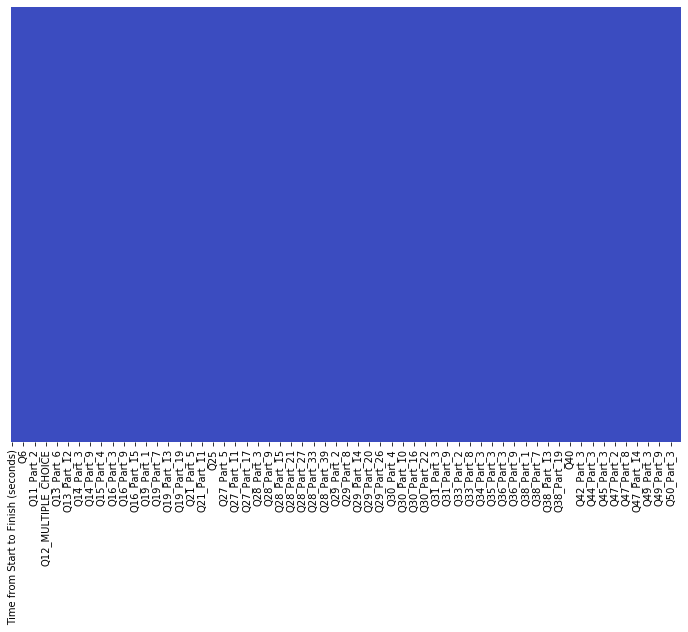

In [69]:
fig, ax = plt.subplots(figsize=(12,8))
sns.heatmap(mcrdf.isnull(), cmap='coolwarm', yticklabels=False, cbar=False, ax=ax)

#### From the heatmap above, it shows there are no missing values in the dataset. Now we're on to the next phase

# (2) Exploratory Data Analysis

#### This is an approach of using visual methods to encapsulate important features in the dataset.
##### But before we start, the Q9 column (What is your current yearly compensation (approximate USD) contains information about the salary range and was filled as string. I am going to replace the cells in Q9 to the upper limit of the respondents selection (i.e '0 - 10,000 would be 10,000, '10 - 20,000 would be 20,000 e.t.c)

In [70]:
#Replacing selected salary range to the upper limit

mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='0-10,000',value = 10000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='10-20,000',value = 20000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='20-30,000',value = 30000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='30-40,000',value = 40000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='40-50,000',value = 50000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='50-60,000',value = 60000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='60-70,000',value = 70000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='70-80,000',value = 80000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='80-90,000',value = 90000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='90-100,000',value = 100000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='100-125,000',value = 125000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='125-250,000',value = 250000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='250-300,000',value = 300000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='300-400,000',value = 400000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='400-500,000',value = 500000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='500,000+',value = 600000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='150-200,000',value = 200000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='125-150,000',value = 150000)
mcrdf['Q9']= mcrdf['Q9'].replace(to_replace='200-250,000',value = 250000)

#### Now, i'm going to remove the rows in the column that contains strings

In [71]:
#Removing the question asked in the column 'Q9'
mcrdf = mcrdf[mcrdf['Q9']!= 'What is your current yearly compensation (approximate $USD)?']

In [72]:
#Removing the rows where salary is not disclosed
mcrdf = mcrdf[mcrdf['Q9']!= 'I do not wish to disclose my approximate yearly compensation']

In [73]:
#converting column 'Q9' - Salary range, to float

mcrdf['Q9'] = mcrdf['Q9'].astype(float)

### Plotting a histogram of 15 bins to showing showing number of respondents by their salary range

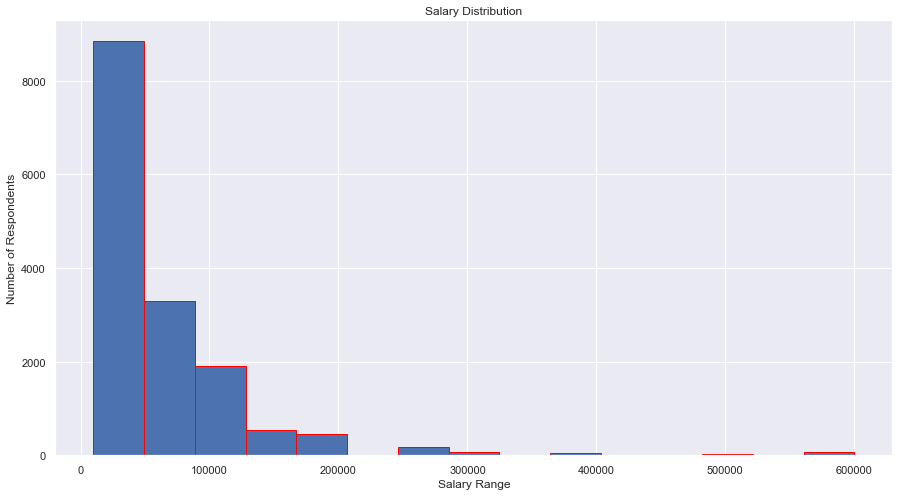

In [74]:

sns.set(rc={'figure.figsize':(15,8)})
plt.hist(mcrdf['Q9'], bins = 15, edgecolor='red')
plt.title("Salary Distribution")
plt.xlabel("Salary Range")
plt.ylabel("Number of Respondents")
plt.show()

### Number of respondents by Gender and Level of education

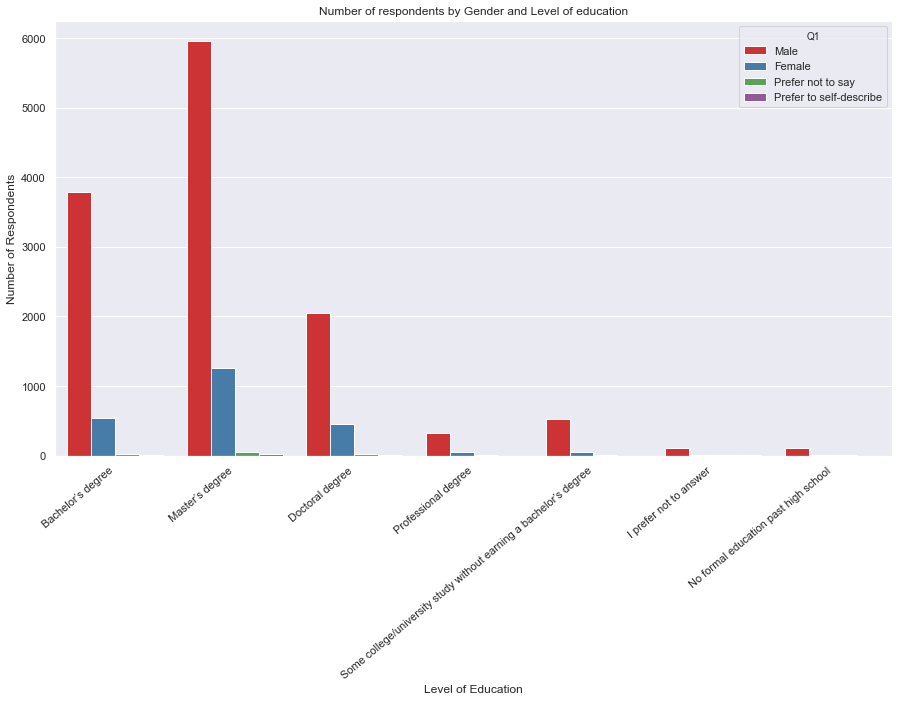

In [75]:
# Barplot illustration showing; Ratio of Gender and level of Education of the respondents
ax = sns.countplot(x="Q4", hue="Q1", data=mcrdf, palette="Set1")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set(rc={'figure.figsize':(18,12)})
plt.title('Number of respondents by Gender and Level of education')
plt.xlabel('Level of Education')
plt.ylabel('Number of Respondents')
plt.show()

#https://elitedatascience.com/python-seaborn-tutorial
#https://seaborn.pydata.org/generated/seaborn.boxplot.html#targetText=A%20box%20plot%20(or%20box,levels%20of%20a%20categorical%20variable.

###### For the sake of crusiosity, the plot above shows that the data science field is highly dominated by individuals with a Master's degree. It also shows the drastic imbalance of gender, so far it shows the male gender are of a larger population in the field

## The following are boxplots, to shed more insights and trends in the dataset

#### I used boxplot to illustrate the numerical value of variables because it describes more than one element. The advantages of using the boxplot is that it provides information for  the minimum, 1st quartile, median, 3rd quartile and maximum value. It also shows outliers present. 


### Salary range according to gender of respondents


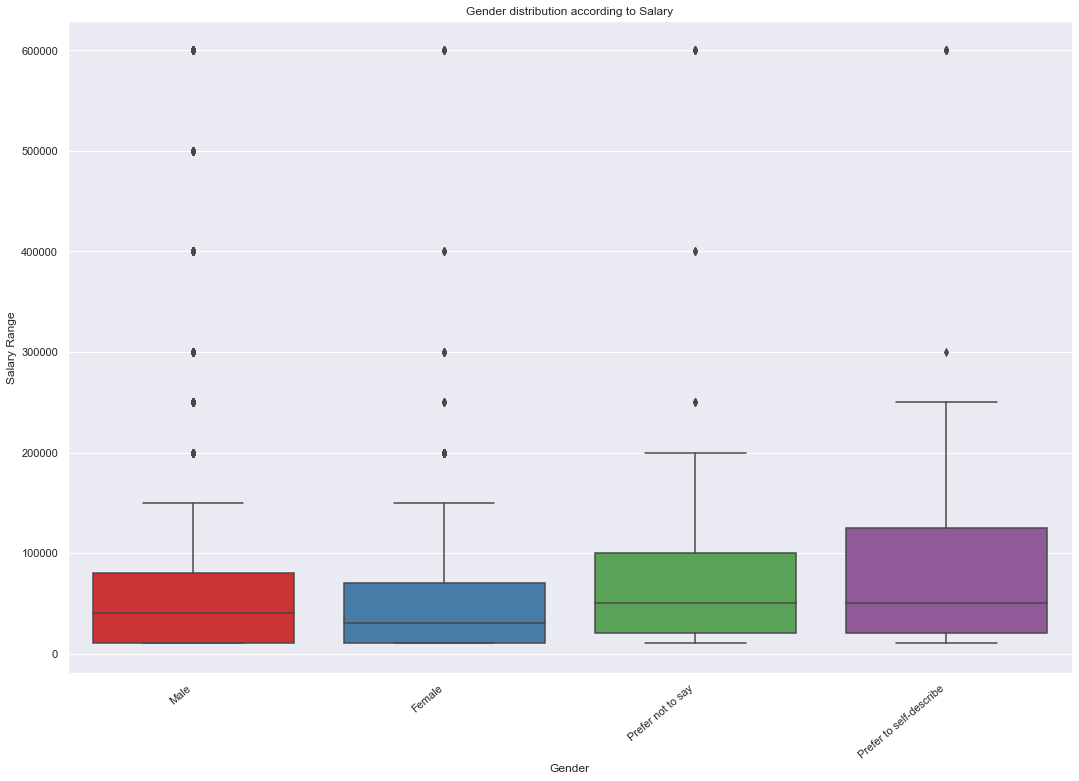

In [76]:
# Boxplot illustration showing: Gender distribution according to Salary

ax = sns.boxplot(x="Q1", y="Q9", data=mcrdf, palette="Set1")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set(rc={'figure.figsize':(12,12)})
plt.title('Gender distribution according to Salary')
plt.xlabel('Gender')
plt.ylabel('Salary Range')
plt.show()

#### The plot above indicates that there is a wage imbalance between the male and female gender.  Notwithstanding the fact that it a slight gap, it is evident with the boxplot illustrated above that men earn more salary than women which proves the bias and unfair behaviour towards women in industry. 

### Now we're going to verify if it is the same case for all countries
#### To visualize this properly (because there are over 50 countries) we are going to create a group of countries with less than 130 respondents and call it "Other Countries". By doing this it will reduce the amount of countries on the x-axis and would make the plot more detectable

In [77]:
#Grouping Countries with less than 130 respondents
countries_counts = mcrdf.Q3.value_counts()
value_mask = mcrdf.Q3.isin(countries_counts.index[countries_counts < 130])
mcrdf.loc[value_mask,'Q3'] = "Other Countries"

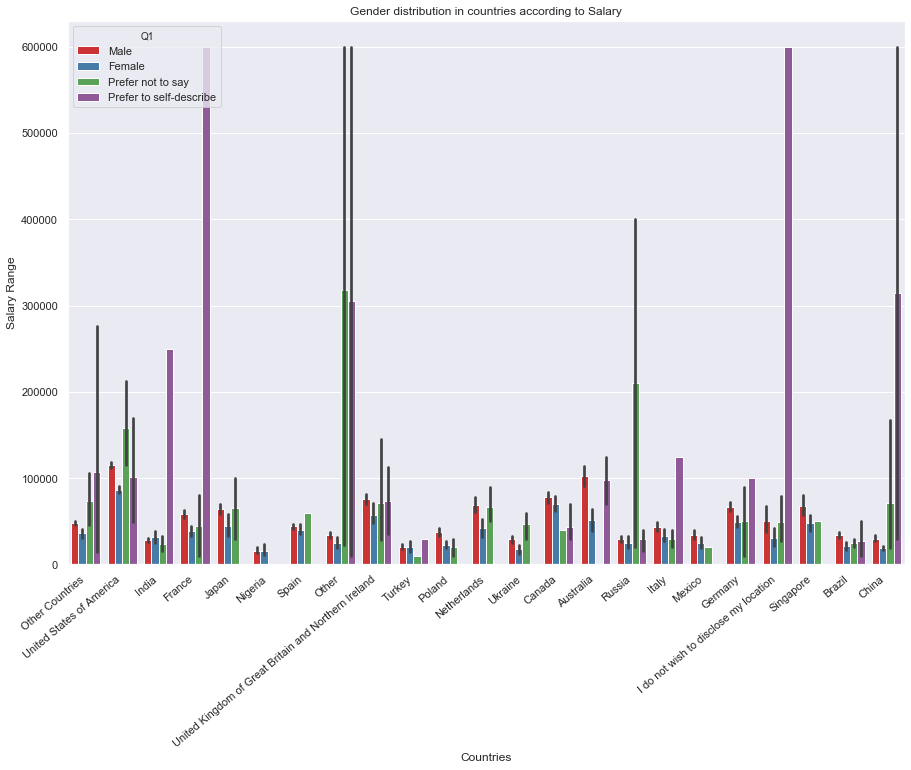

In [99]:
# Boxplot illustration showing: Gender distribution according to Salary

ax = sns.barplot(x="Q3", y="Q9",hue="Q1", data=mcrdf, palette="Set1")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set(rc={'figure.figsize':(15,12)})
plt.title('Gender distribution in countries according to Salary')
plt.xlabel('Countries')
plt.ylabel('Salary Range')
plt.show()

#### From the plot above, it is shown that the wage imbalance issue applies for all countries present in this data set excluding just India. In India, the women earn more than men although it is just a minuscule difference. The boxplot also indicates that there is not much wage gap for both gender in Nigeria and Turkey. 


### Salary range per years of work experience


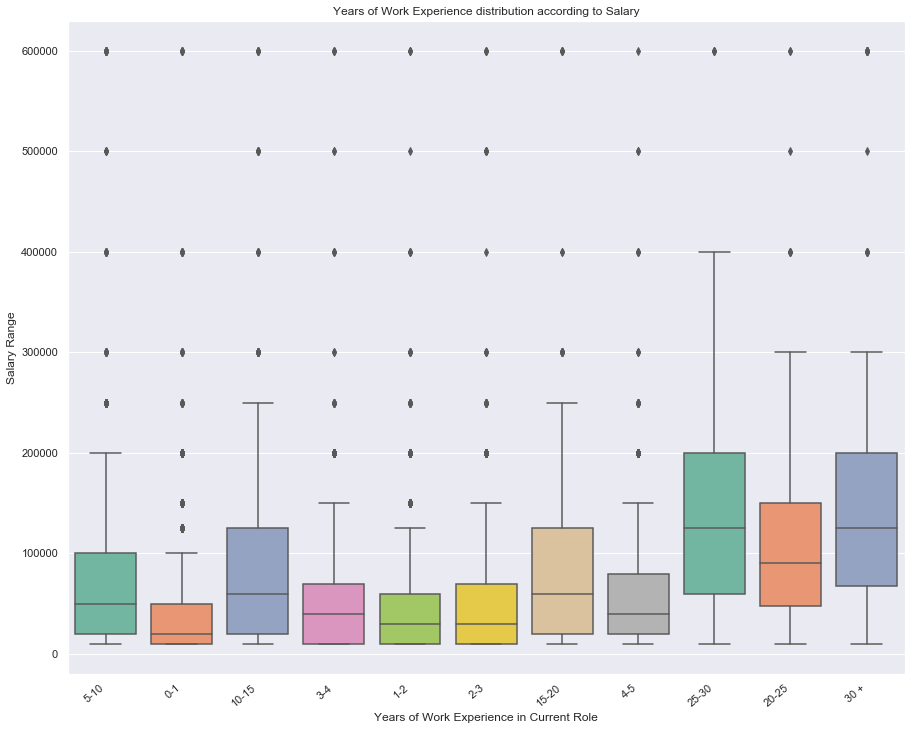

In [79]:
# Boxplot illustration showing; Years of Work Experience distribution according to Salary
ax = sns.boxplot(x="Q8", y="Q9", data=mcrdf, palette="Set2")

ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
sns.set(rc={'figure.figsize':(15,10)})
plt.title('Years of Work Experience distribution according to Salary')
plt.xlabel('Years of Work Experience in Current Role')
plt.ylabel('Salary Range')
plt.show()

#### As imagined from the plot above, it is obvious that the more years of work experience an individual have in their current role,  the  the higher the annual compensation, but it gets to a point where it declines. 25-30 years of experience is where the peak income is observed, afterwards there'll be a decline in the annual compensation.


### Salary range per level of education of respondents


### Salary range in relation to Online Learning Platform

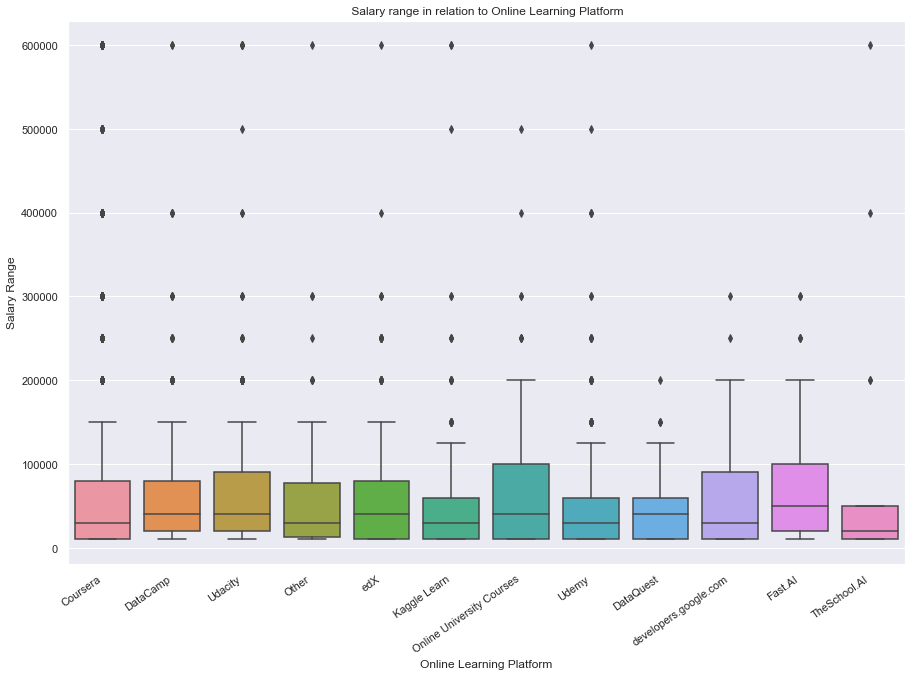

In [80]:
# Boxplot illustration showing: Online Learning Platform distribution according to Salary
ax = sns.boxplot(x="Q37", y="Q9", data=mcrdf)

ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
sns.set(rc={'figure.figsize':(15,10)})
plt.title(' Salary range in relation to Online Learning Platform')
plt.xlabel('Online Learning Platform')
plt.ylabel('Salary Range')
plt.show()

#### Here, the plot above shows respondents who spent most of their time taking Online University Courses or Fast.AI online course earn more money compared to individuals using other online platforms. It could be because those platforms offers a vigorous course modules which allows individuals spend more time/ acquire more expertise to be applied in the industry and the other Online Learning Platform with lesser compensation is not as robust.

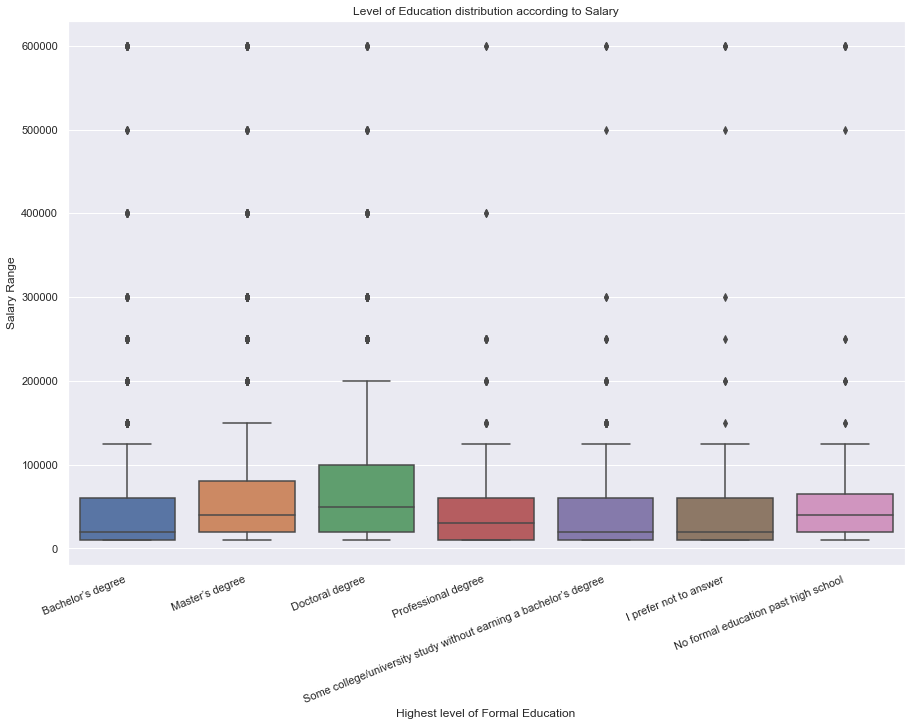

In [81]:
# Boxplot illustration showing: Level of Education distribution according to Salary
ax = sns.boxplot(x="Q4", y="Q9", data=mcrdf)

ax.set_xticklabels(ax.get_xticklabels(), rotation=22, ha="right")
sns.set(rc={'figure.figsize':(13,13)})
plt.title('Level of Education distribution according to Salary')
plt.xlabel('Highest level of Formal Education')
plt.ylabel('Salary Range')
plt.show()

#### From the plot above, it  shows that obtaining a Doctoral degree would boost the yearly compensation compared to just acquiring a Bachelor's degree or Master's degree. 

### Salary range per Industry of respondents

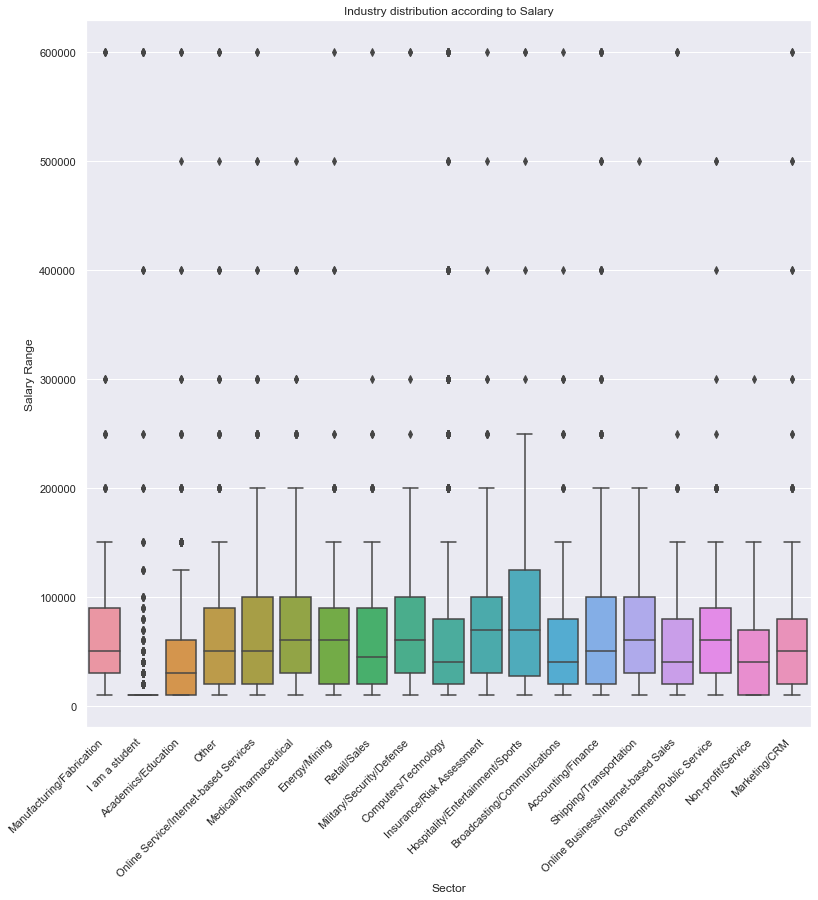

In [82]:
# Boxplot illustration showing: Industry distribution of respondents according to Salary
ax = sns.boxplot(x="Q7", y="Q9", data=mcrdf)

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha="right")
sns.set(rc={'figure.figsize':(15,12)})
plt.title('Industry distribution according to Salary')
plt.xlabel('Sector')
plt.ylabel('Salary Range')
plt.show()

#### Here, the plot above shows that the Hospitality/Entertainment/Sports industry compensate Data Scientists/Software Engineer/Analysts more compared to other industry. The individuals working in the Academics/Education industry have the least annual compensation.

### Salary range per Country

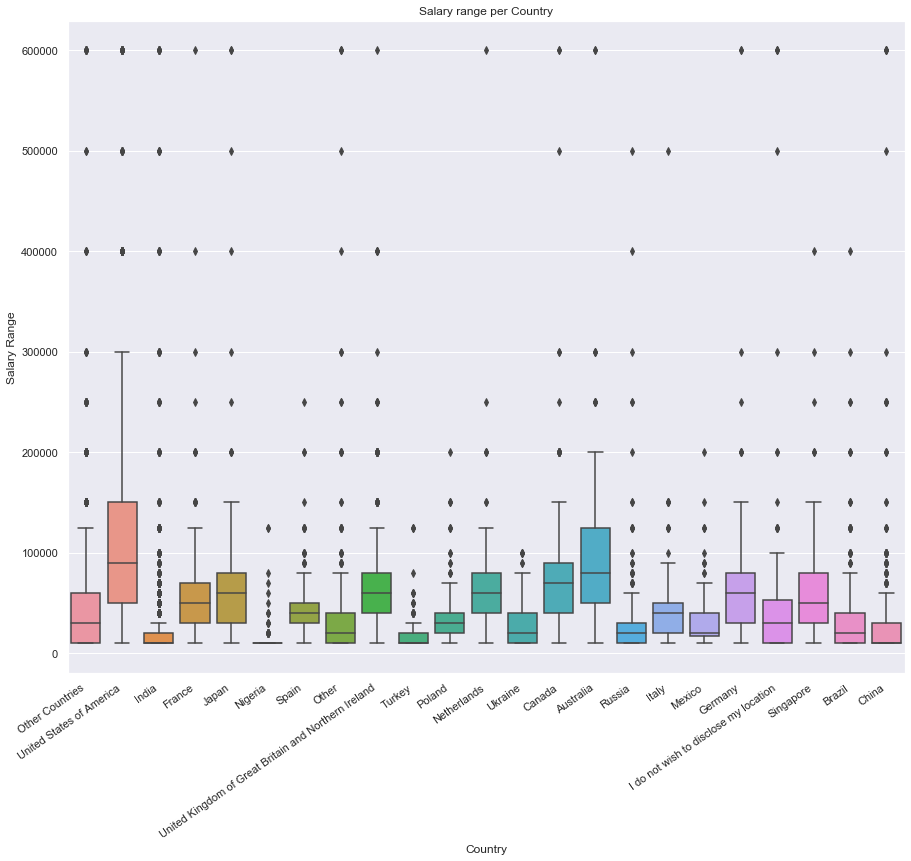

In [83]:
# Boxplot illustration showing: Online Learning Platform distribution according to Salary
ax = sns.boxplot(x="Q3", y="Q9", data=mcrdf)

ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
sns.set(rc={'figure.figsize':(13,10)})
plt.title('Salary range per Country')
plt.xlabel('Country')
plt.ylabel('Salary Range')
plt.show()

#### The boxplot above shows the individuals in te United States of America typically earn more compared to people based in other countries.

### Salary range in relation to the Job Role of respondents

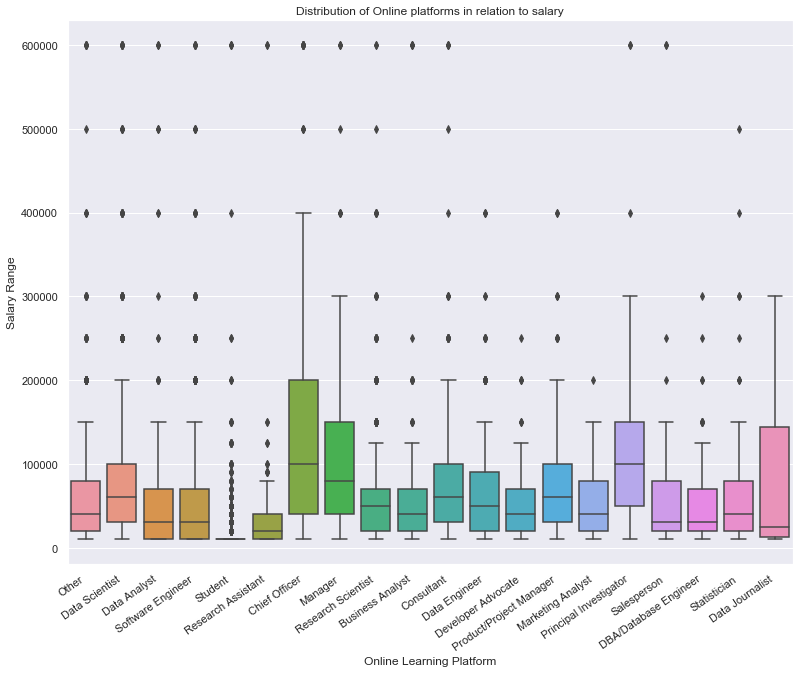

In [84]:
# Boxplot illustration showing: Online Learning Platform distribution according to Salary
ax = sns.boxplot(x="Q6", y="Q9", data=mcrdf)

ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
sns.set(rc={'figure.figsize':(15,11)})
plt.title('Distribution of Online platforms in relation to salary')
plt.xlabel('Online Learning Platform')
plt.ylabel('Salary Range')
plt.show()

#### From the boxplot above, as expected, it  shows that Chief Officer earns more compared to other roles but in the Data Science community, Data Journalists and Data Scientist earn more salary compared to Data Engineers, DBA/Database Engineer, Software Engineer and the likes

### Salary range according to percentage spent on data projects involving exploring model insights

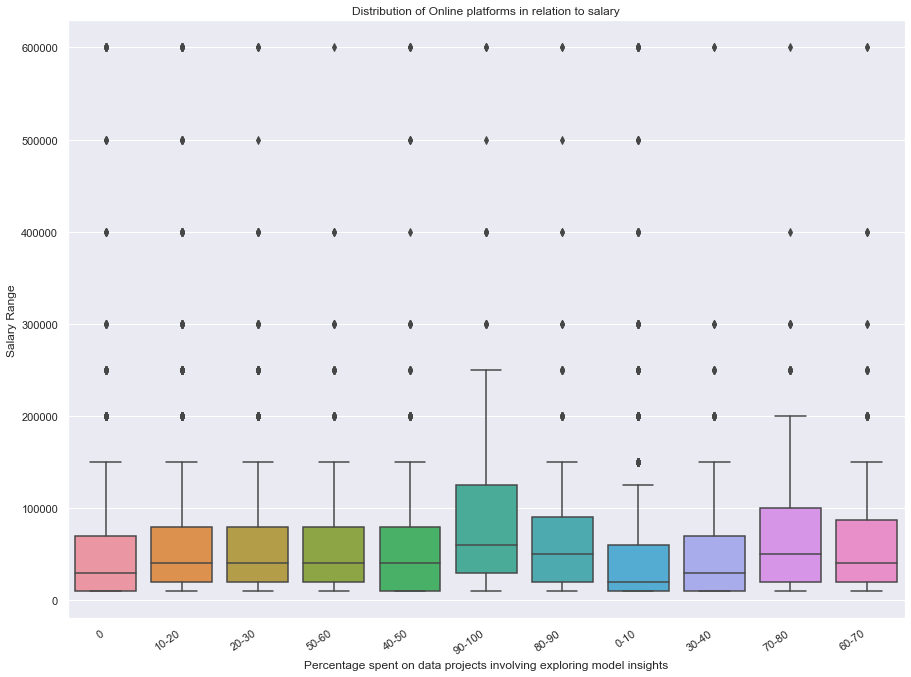

In [85]:
# Boxplot illustration showing: Online Learning Platform distribution according to Salary
ax = sns.boxplot(x="Q46", y="Q9", data=mcrdf)

ax.set_xticklabels(ax.get_xticklabels(), rotation=35, ha="right")
sns.set(rc={'figure.figsize':(15,10)})
plt.title('Distribution of Online platforms in relation to salary')
plt.xlabel('Percentage spent on data projects involving exploring model insights')
plt.ylabel('Salary Range')
plt.show()

#### Here, the plot above shows respondents who spent most 90-100% of time on data projects involving exploring model insights earn more compared to individuals who spend less time of said projects.

### Salary range according to years spent writing code to analyze data

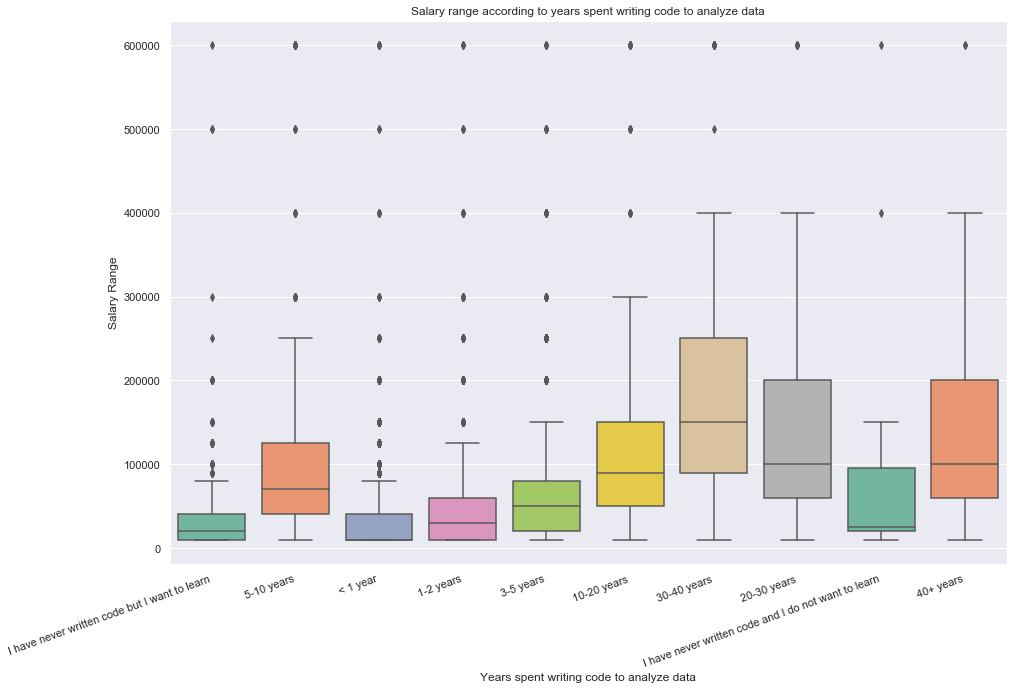

In [86]:
# Boxplot illustration showing: Online Learning Platform distribution according to Salary
ax = sns.boxplot(x="Q24", y="Q9", data=mcrdf, palette='Set2')

ax.set_xticklabels(ax.get_xticklabels(), rotation=20, ha="right")
sns.set(rc={'figure.figsize':(15,10)})
plt.title('Salary range according to years spent writing code to analyze data')
plt.xlabel('Years spent writing code to analyze data')
plt.ylabel('Salary Range')
plt.show()

#### The boxplot above shows that there is a proportional relationship with earnings and years spent coding to analayze data. The more experience an individual have in wiriting code to analyze the more the salary. Someone who has been writing code to analyze data for over 30 years is expected to have a higher salary compared to an individual who has been coding for roughly 3-5 years.

# . 

## One Hot Encoding

#### Since columns of our dataset contains categorical data, the implemention if One Hot Enconding was carried out on the dataset. This method takes column which contains categorical data and then converts it to numerical values. The benefits of using one hot encoding is that the confusion caused my integer size is avoided. Another way of encoding is by using the label encoding method, but the drawback of label encoding is that the numeric values can be misread by the algorithm. I am implementing one hot encoding to enable the machine learning algorithm read the data. 

##### I will be encoding using dummy variables and the column 'Time from Start to Finish (in seconds) would be excluded and this would be saved in a new dataframe

In [87]:

mcdf  = pd.get_dummies(data=mcrdf, columns=['Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8','Q10','Q12_MULTIPLE_CHOICE','Q17','Q18','Q20','Q22','Q23','Q24','Q25','Q26','Q32','Q37','Q40','Q43','Q46','Q48'])

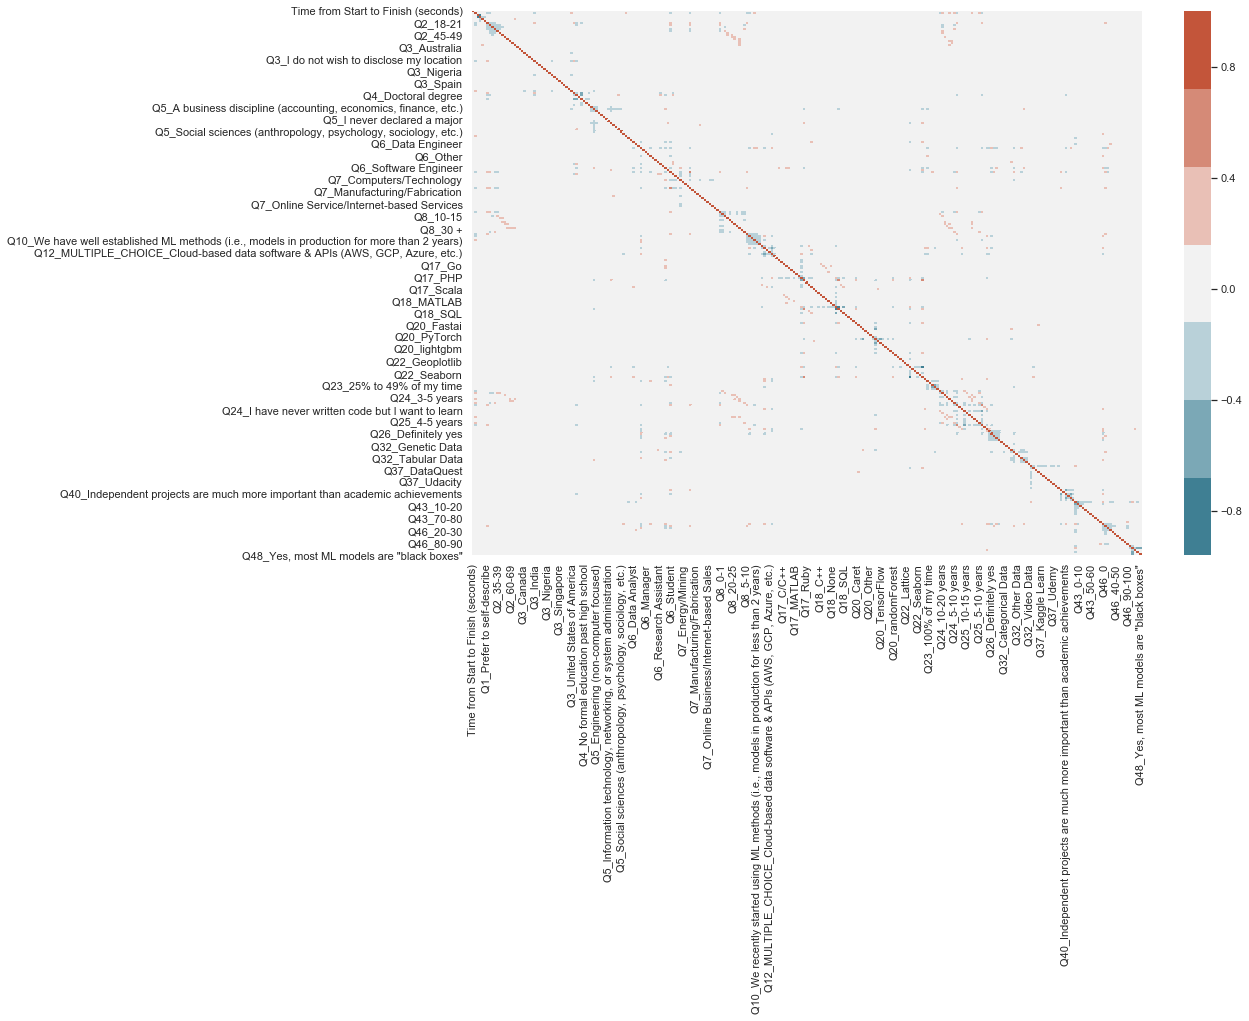

In [88]:
sns.heatmap(mcdf.corr(), cmap = sns.diverging_palette(220, 20, n=7))

#### The plot correlation plot above shows the correlation of the columns with a red line running diagonally. 

# Feature Selection

#### Feature selection also known as Variable selection or Attribute selection, is a technique of selecting the most important attribute from a dataset and this should not be confused with dimensionality reduction although both process tend to reduce the number of features in a dataset. In many cases, when working with a high dimensional dataset like ours, there will  be unimportant features. This process can be done automatically or manually by selecting those features that are highly contibuting the most to the set prediction variable or output. 
#### The importance of feature selection includes the following;
#### (a) Enables machine learning algorithm to train faster
#### (b) It improves the precision of a model
#### (c) It reduces overfitting
#### (d) It reduces the complexity of a model

###### Source: https://www.datacamp.com/community/tutorials/feature-selection-python

#### Below, the target variable is created (Y = 'salary column' - Q9) and the feature variable x - the rest of the columns after removing the 'salary column'

In [123]:
X = mcdf.drop('Q9',axis=1)
y = mcdf['Q9']
#Splitting to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)
X_train.shape, X_test.shape
CY = y_train

### Using RFE to rank features

#### Recursive feature elimanation is used to sort features by recursively considering the unimportant sets of features. "The least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached".

#### The 'support' is used to provide True or False to signify if the feature is important or otherwise but 'ranking' position the features in order of importance 


###### Source: https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html

In [90]:
ridge = Ridge(alpha=8)
rfe = RFE(ridge)
fit = rfe.fit(X_train[0:5000], y_train[0:5000])
fit.support_

array([False, False, False, False,  True, False,  True, False,  True,
        True, False, False,  True,  True, False, False,  True, False,
       False,  True, False,  True, False, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False, False,
        True,  True,  True, False,  True, False, False, False,  True,
       False, False, False, False, False, False, False,  True, False,
        True, False,  True, False,  True, False, False, False,  True,
       False, False,  True,  True, False, False,  True,  True, False,
       False, False,  True, False,  True,  True, False, False, False,
       False,  True, False, False, False, False, False, False,  True,
        True, False, False, False,  True,  True, False,  True, False,
        True,  True, False,  True,  True, False, False,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True, False,  True, False,  True,  True,  True, False,  True,
        True,  True,

In [91]:

features = X_train[X_train.columns[fit.support_]]
features

Q11_Part_4 Q11_Part_6 Q13_Part_1 Q13_Part_2 Q13_Part_5 Q13_Part_6  \
18516          0          0          1          1          0          1   
6551           0          1          0          0          0          0   
2534           1          0          1          1          0          1   
9400           0          0          1          1          0          0   
11152          1          0          1          0          0          0   
...          ...        ...        ...        ...        ...        ...   
16491          0          0          0          0          0          0   
20580          1          0          1          1          0          1   
8952           0          0          0          1          0          0   
3528           1          0          1          1          0          0   
9917           0          0          1          0          0          0   

      Q13_Part_9 Q13_Part_12 Q13_Part_14 Q14_Part_4 Q14_Part_7 Q14_Part_8  \
18516          0           0           0          0          0          0   
6551           0           0           1          0          0          0   
2534           1           1           0          0          0          0   
9400           0           0           0          0          0          0   
11152          0           0           0          0          0          0   
...          ...         ...         ...        ...        ...        ...   
16491          0           0           0          0          0          0   
20580          1           0           0          0          0          0   
8952           1           0           0          0          0          0   
3528           0           0           0          0          0          0   
9917           1           0           0          0          0          0   

      Q14_Part_9 Q15_Part_3 Q15_Part_4 Q15_Part_5 Q15_Part_7 Q16_Part_4  \
18516          0          1          0          0          1          0   
6551           0          0          0          0          0          0   
2534           1          0          0          0          0          0   
9400           0          0          0          0          0          0   
11152          1          0          0          0          0          0   
...          ...        ...        ...        ...        ...        ...   
16491          0          0          0          0          0          0   
20580          1          1          0          0          0          0   
8952           0          1          0          0          0          1   
3528           0          0          1          0          0          1   
9917           0          0          0          0          0          0   

      Q16_Part_12 Q16_Part_14 Q16_Part_16 Q16_Part_18 Q19_Part_4 Q19_Part_7  \
18516           0           0           0           0          0          0   
6551            0           0           0           0          0          0   
2534            0           0           0           0          1          1   
9400            0           0           0           0          0          0   
11152           0           0           0           0          1          0   
...           ...         ...         ...         ...        ...        ...   
16491           0           0           0           0          0          0   
20580           0           0           0           0          0          0   
8952            0           0           0           0          0          0   
3528            0           0           0           0          0          0   
9917            0           0           0           0          0          0   

      Q19_Part_8 Q19_Part_11 Q19_Part_12 Q19_Part_16 Q19_Part_18 Q19_Part_19  \
18516          0           0           0           0           0           1   
6551           0           0           0           0           1           0   
2534           0           0           0           0           0           0   
9400      

In [92]:
#Ranking the features
sorted(list(zip(fit.ranking_,X_train))[0:15])

[(1, 'Q11_Part_4'),
 (1, 'Q11_Part_6'),
 (1, 'Q13_Part_1'),
 (1, 'Q13_Part_2'),
 (1, 'Q13_Part_5'),
 (1, 'Q13_Part_6'),
 (31, 'Q11_Part_7'),
 (76, 'Q11_Part_2'),
 (94, 'Q11_Part_1'),
 (95, 'Q11_Part_3'),
 (97, 'Q13_Part_7'),
 (108, 'Q11_Part_5'),
 (223, 'Q13_Part_4'),
 (233, 'Q13_Part_3'),
 (301, 'Time from Start to Finish (seconds)')]

In [93]:
#Scaling
Scaler = StandardScaler()
Scaler.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

### Principal Component Analysis to reduce the features further

#### Principal component analysis controls the number of features used based on the cummulative explained variance, the curve is shown below

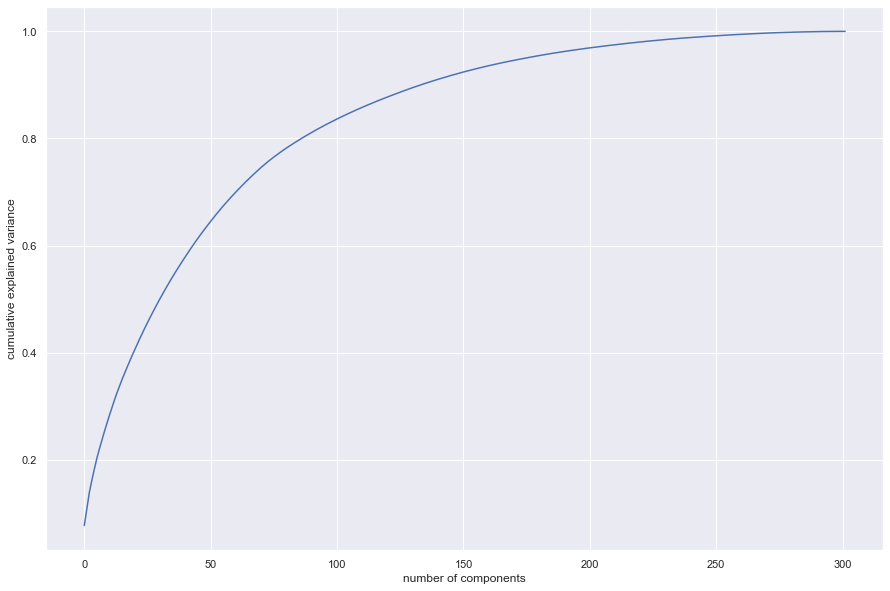

In [94]:
from sklearn.decomposition import PCA
pca = PCA().fit(features)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

#### The line indicates the proportion of variance explained by each feature

### PCA allows to select the numbers of feature values, 100 features were selected as a result of having 80% of the varience explained by this number

In [135]:
#Setting the amount of features to be used to 100
pca = PCA(n_components=100)
pca.fit(features)

PCA(copy=True, iterated_power='auto', n_components=100, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [136]:
#Confirming the shape of the new set
pca = PCA(n_components=100)
pca.fit(features)
X_pca = pca.transform(features)
print("original shape:   ", features.shape)
print("transformed shape:", X_pca.shape)

original shape:    (10800, 302)
transformed shape: (10800, 100)


# Model Implementation

## Using Logistic Regression

#### Here, logistic regression was used to show the relationship between the variables, since our dataset contains binary values, this is good technique to implement. 

In [139]:
CX = pd.DataFrame(data=X_pca)
X = X_pca
y = CY
#Splitting to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)
X_train.shape, X_test.shape

((7560, 100), (3240, 100))

In [140]:
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
predictions = model.predict(X_test)
    
TN = confusion_matrix(y_test, predictions)[0][0]
FP = confusion_matrix(y_test, predictions)[0][1]
FN = confusion_matrix(y_test, predictions)[1][0]
TP = confusion_matrix(y_test, predictions)[1][1]
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)

print ("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))   

This model got an accuracy of 74.63% on the testing set


In [176]:
X = CX
y = CY

### K-Fold Cross-Validation

#### That k-fold cross validation is  used to evaluate the machine learning model, where the training set is split into k equal sizes. In this case, you can set a particular value for 'K'. This may be used in place of k in the reference to the model, such as k=10 becoming 10-fold cross-validation. The dataset is randomly shuffled, the splits would be carried out to the set number of 'k', it selects the test data and assign the rest as training data set. At the end of the run, the efficiency of the model evaluation is scored.


In [177]:
model = LogisticRegression()
scaler = StandardScaler()
kfold = KFold(n_splits=10)
kfold.get_n_splits(X)

accuracy = np.zeros(10)
np_idx = 0

for train_idx, test_idx in kfold.split(X):
    X_train, X_test = X.values[train_idx], X.values[test_idx]
    y_train, y_test = y.values[train_idx], y.values[test_idx]
    
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)
    
    model.fit(X_train, y_train)
    
    predictions = model.predict(X_test)
    
    TN = confusion_matrix(y_test, predictions)[0][0]
    FP = confusion_matrix(y_test, predictions)[0][1]
    FN = confusion_matrix(y_test, predictions)[1][0]
    TP = confusion_matrix(y_test, predictions)[1][1]
    total = TN + FP + FN + TP
    ACC = (TP + TN) / float(total)
    
    accuracy[np_idx] = ACC*100
    np_idx += 1
    
    print ("Fold {}: Accuracy: {}%".format(np_idx, round(ACC,3)))   
std_outcome=np.std(accuracy)
print("Standard Deviation: {0}".format(std_outcome)) 
print ("Average Score: {}%({}%)".format(round(np.mean(accuracy),3),round(np.std(accuracy),3)))

Fold 1: Accuracy: 0.787%
Fold 2: Accuracy: 0.729%
Fold 3: Accuracy: 0.727%
Fold 4: Accuracy: 0.755%
Fold 5: Accuracy: 0.719%
Fold 6: Accuracy: 0.724%
Fold 7: Accuracy: 0.734%
Fold 8: Accuracy: 0.733%
Fold 9: Accuracy: 0.72%
Fold 10: Accuracy: 0.744%
Standard Deviation: 1.9535582824804039
Average Score: 73.718%(1.954%)


#### As shown above, the standard deviation is approximately 1.954 and the average score is 73.72%, The first fold performed best with an accuracy an of 78.7%

## Probability Income

#### This provides the prediction probability for each of the 18 income salary classes.

In [181]:
Probability_income = pd.DataFrame(data = model.predict_proba(X_train))
Probability_income

0         1         2         3         4         5         6  \
0     0.023824  0.075599  0.083696  0.090008  0.180518  0.111230  0.073031   
1     0.280953  0.151902  0.069307  0.087549  0.042552  0.122665  0.104784   
2     0.524284  0.201686  0.185122  0.049664  0.008239  0.003465  0.004011   
3     0.172767  0.113149  0.095218  0.113882  0.122383  0.108161  0.082784   
4     0.078524  0.093486  0.067078  0.150359  0.138435  0.098266  0.048311   
...        ...       ...       ...       ...       ...       ...       ...   
9715  0.037330  0.160045  0.072355  0.079865  0.096922  0.120717  0.102639   
9716  0.093897  0.208593  0.204911  0.071542  0.116884  0.073312  0.019970   
9717  0.002823  0.020452  0.042815  0.020784  0.029318  0.019370  0.064766   
9718  0.056144  0.175002  0.232846  0.099691  0.138642  0.051026  0.051392   
9719  0.531003  0.243856  0.083756  0.074073  0.018279  0.009309  0.006842   

             7         8         9        10        11        12        13  \
0     0.110909  0.034311  0.043146  0.097117  0.040632  0.022840  0.002902   
1     0.024562  0.033080  0.018251  0.040949  0.004843  0.010071  0.002090   
2     0.005682  0.002891  0.002037  0.006623  0.001054  0.000276  0.000036   
3     0.061249  0.028813  0.045892  0.037127  0.011025  0.002466  0.001670   
4     0.039705  0.065578  0.059279  0.095579  0.015475  0.028591  0.011266   
...        ...       ...       ...       ...       ...       ...       ...   
9715  0.039534  0.120882  0.041220  0.100246  0.012457  0.000981  0.010347   
9716  0.108601  0.017424  0.042348  0.028380  0.001996  0.005835  0.001353   
9717  0.112771  0.022522  0.047085  0.136975  0.255880  0.218227  0.000917   
9718  0.043062  0.029914  0.044244  0.040328  0.016404  0.009930  0.004306   
9719  0.008265  0.002534  0.001621  0.003821  0.001252  0.000473  0.000468   

            14        15        16        17  
0     0.000444  0.001207  0.000675  0.007912  
1     0.001277  0.002472  0.002151  0.000543  
2     0.000160  0.002058  0.002676  0.000039  
3     0.001014  0.000132  0.001535  0.000732  
4     0.003705  0.004665  0.001503  0.000196  
...        ...       ...       ...       ...  
9715  0.001023  0.003075  0.000206  0.000156  
9716  0.000261  0.000146  0.001631  0.002916  
9717  0.000053  0.000085  0.000212  0.004944  
9718  0.001311  0.003083  0.001159  0.001515  
9719  0.000690  0.002635  0.010432  0.000692  

[9720 rows x 18 columns]

## Learning Curve

#### The learning curve determines cross-validated training and test scores for different training set sizes, below the parameter plot_learning_curve is called.

In [146]:
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy'):
    
    plt.figure(figsize=(10,6))
    plt.title(title)
    
    if ylim is not None:
        plt.ylim(*ylim)
        
    plt.xlabel("Training examples")
    plt.ylabel(scoring)
    
    train_sizes, train_scores, test_scores = learning_curve(estimator, X, y, cv=cv, scoring=scoring, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,\
                     train_scores_mean + train_scores_std, alpha=0.1, \
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,\
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")
    
    return plt

<module 'matplotlib.pyplot' from '/opt/anaconda3/lib/python3.7/site-packages/matplotlib/pyplot.py'>

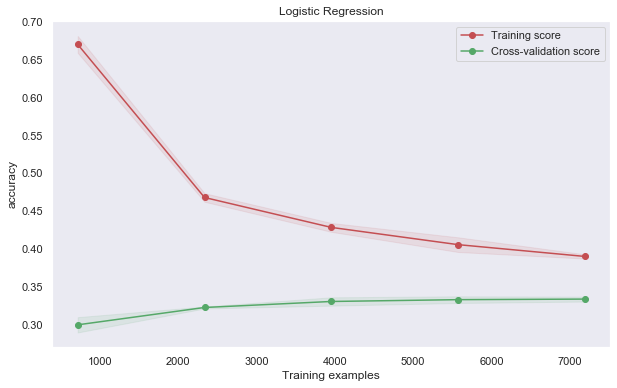

In [166]:
X = X_pca
y = CY
estimator=  LogisticRegression()
title = ''
plot_learning_curve(estimator, 'Logistic Regression', X, y, ylim=None, cv=None, n_jobs=1,\
                        train_sizes=np.linspace(.1, 1.0, 5), scoring='accuracy')

#### The learning curve plotted above shows that the the cross-validation score is very low at the beginning and increases gradually, and the training score is very high at the beginning and decreases. 

# Model Tuning

### Using Grid Search

#### It is a hyper parameter tuning method to determine the optimal values of the model, the downside to using grid search method is that the dimensionality can be drastically affected when the number of hyper parameters grows exponentially. This is a much comprehensive method than random search as it sets up a grid of hyperparameter values and selects random combinations to train the model and score.

###### Source; https://blog.usejournal.com/a-comparison-of-grid-search-and-randomized-search-using-scikit-learn-29823179bc85#targetText=Grid%20vs.%20Random%20Search%3A&targetText=When%20tuning%20the%20hyperparameters%20of,Search%20are%20both%20popular%20methods.&targetText=By%20contrast%2C%20Random%20Search%20sets,train%20the%20model%20and%20score.

In [164]:
# X = CX
# y = CY
# model = LogisticRegression()
# scaler = StandardScaler()
# kfold = KFold(n_splits=10)
# kfold.get_n_splits(X)

# best_model = model
# best_params = {}
# best_accuracy = 0
# best_std = 0

# for C in [0.001,0.01,0.05,0.1,0.5,1,5,10]:
#     for solver in ['lbfgs','sag']:
        
#         model = LogisticRegression(C=C, solver=solver)
#         accuracy = np.zeros(10)
#         np_idx = 0
        
#         for train_idx, test_idx in kfold.split(X):
#             X_train, X_test = X.values[train_idx], X.values[test_idx]
#             y_train, y_test = y.values[train_idx], y.values[test_idx]

#             X_train = scaler.fit_transform(X_train)
#             X_test = scaler.transform(X_test)

#             model.fit(X_train, y_train)

#             predictions = model.predict(X_test)

#             TN = confusion_matrix(y_test, predictions)[0][0]
#             FP = confusion_matrix(y_test, predictions)[0][1]
#             FN = confusion_matrix(y_test, predictions)[1][0]
#             TP = confusion_matrix(y_test, predictions)[1][1]
#             total = TN + FP + FN + TP
#             ACC = (TP + TN) / float(total)

#             accuracy[np_idx] = ACC*100
#             np_idx += 1
        
#         if np.mean(accuracy) > best_accuracy:
#             best_model = model
#             best_params = {'C':C, 'solver':solver}
#             best_accuracy = np.mean(accuracy)
#             best_std = np.std(accuracy)

# print (best_params)
# print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

# print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.5, 'solver': 'sag'}
Best Score: 73.759%(1.994%)

The optimal log model uses C=0.5, and a sag solver, and has a cross validation score of 73.759% with a standard deviation of 1.994%


In [165]:
# X = CX
# y = CY
# model = LogisticRegression()
# scaler = StandardScaler()
# kfold = KFold(n_splits=10)
# kfold.get_n_splits(X)

# best_model = model
# best_params = {}
# best_accuracy = 0
# best_std = 0

# #for C in [0.001,0.01,0.05,0.1,0.5,1,5,10]:
#     for solver in ['lbfgs','sag']:
        
#         model = LogisticRegression(C=C, solver=solver)
#         accuracy = np.zeros(10)
#         np_idx = 0
        
#         for train_idx, test_idx in kfold.split(X):
#             X_train, X_test = X.values[train_idx], X.values[test_idx]
#             y_train, y_test = y.values[train_idx], y.values[test_idx]

#             X_train = scaler.fit_transform(X_train)
#             X_test = scaler.transform(X_test)

#             model.fit(X_train, y_train)

#             predictions = model.predict(X_test)

#             TN = confusion_matrix(y_test, predictions)[0][0]
#             FP = confusion_matrix(y_test, predictions)[0][1]
#             FN = confusion_matrix(y_test, predictions)[1][0]
#             TP = confusion_matrix(y_test, predictions)[1][1]
#             total = TN + FP + FN + TP
#             ACC = (TP + TN) / float(total)

#             accuracy[np_idx] = ACC*100
#             np_idx += 1
        
#         if np.mean(accuracy) > best_accuracy:
#             best_model = model
#             best_params = {'C':C, 'solver':solver}
#             best_accuracy = np.mean(accuracy)
#             best_std = np.std(accuracy)

# print (best_params)
# print ("Best Score: {}%({}%)".format(round(best_accuracy,3),round(best_std,3)))      

# print ("\nThe optimal log model uses C={}, and a {} solver, and has a cross validation score of {}% with a standard deviation of {}%".format(best_params['C'],best_params['solver'],round(best_accuracy,3),round(best_std,3)))

{'C': 0.5, 'solver': 'sag'}
Best Score: 73.759%(1.994%)

The optimal log model uses C=0.5, and a sag solver, and has a cross validation score of 73.759% with a standard deviation of 1.994%


# Testing

### Using the optimal model

#### Here in the testing phase,  we are using the optimal model executed during the model tuning section to make predictions on the test, and evaluate the overall model fit.
#### As shown, the most desirable C to use is 0.5 and the solver is 'sag', now we're going to test the model with the optimal model C value given and solver.

In [170]:
tmodel = LogisticRegression(C=0.5,solver = 'sag') 
X = CX
Y = CY
#Splitting to train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=2)
X_train.shape, X_test.shape

In [172]:
tmodel.fit(X_train,y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='sag', tol=0.0001, verbose=0,
                   warm_start=False)

#### X_Test Prediction

In [174]:
predictions = tmodel.predict(X_test)
TN = confusion_matrix(y_test, predictions)[0][0]
FP = confusion_matrix(y_test, predictions)[0][1]
FN = confusion_matrix(y_test, predictions)[1][0]
TP = confusion_matrix(y_test, predictions)[1][1]
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)

print ("This model got an accuracy of {}% on the testing set".format(round(ACC*100,2)))  

This model got an accuracy of 74.26% on the testing set


#### X_Train Prediction

In [175]:
predictions = tmodel.predict(X_train)
TN = confusion_matrix(y_train, predictions)[0][0]
FP = confusion_matrix(y_train, predictions)[0][1]
FN = confusion_matrix(y_train, predictions)[1][0]
TP = confusion_matrix(y_train, predictions)[1][1]
total = TN + FP + FN + TP
ACC = (TP + TN) / float(total)
print ("This model got an accuracy of {}% on the training set".format(round(ACC*100,2))) 

This model got an accuracy of 74.78% on the training set


##### From the accuracy of both the testing and tranining set, it is evident that the bias is marginal with a 0.52% difference. The accuracy of both testing and training can be better by changing the test/train ratio, also by the technique used to handle the null values (filling with the mode).